## Stochastic Processes Project: Lotka Volterra Systems

## Introduction

The three population Lotka-Volterra system of ODEs represents the dynamics of ecological systems involving three interacting species.

The interaction matrix, denoted as ($A$), quantifies the strength and directionality of the species' interactions, whereas the intrinsic growth vector, denoted as ($g$), accounts for the autonomous growth rates of the species. The problem can be represented by the following system:


$$
\begin{align*} f_1 = \frac{{dx_1}}{{dt}} &= x_1 \left( g_1 + A_{11}x_1 + A_{12}x_2 + A_{13}x_3 \right) \\ 

f_2 = \frac{{dx_2}}{{dt}} &= x_2 \left( g_2 + A_{21}x_1 + A_{22}x_2 + A_{23}x_3 \right) \\

f_3 = \frac{{dx_3}}{{dt}} &= x_3 \left( g_3 + A_{31}x_1 + A_{32}x_2 + A_{33}x_3 \right) \ \end{align*}
$$

In this project, we first define methods to solve and visualize solutions for a Lotka-Volterra Initial Value Problem. Then, we proceed to identify fixed points, oscillations, and chaos in such systems.


In [2]:
# Importing libraries
import numpy as np
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from itertools import product
import random

# Population Dynamics and Phase Plots

We first plot the populations over time and then draw the phase plots.

A phase plot illustrates the behavior of the solution trajectories in the phase space.

The **phase space** is a space where each axis represents a different variable of the ODE. In the phase plot, the **solution trajectories** are curves or paths traced out by the variables over time.

In [3]:
def plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, t_eval=None, only_pop=False):
    num_species = interaction_matrix.shape[0]
    
    def dXdt(t, X):
        return growth_rates * X + X * (np.dot(interaction_matrix, X))
    
    sol = solve_ivp(dXdt, t_span, initial_populations, method='RK45', t_eval=t_eval)
     # Plotting population dynamics
    plt.figure(figsize=(12, 6))
    for i in range(num_species):
        plt.plot(sol.t, sol.y[i], label=f'Species {i+1}')
    plt.title('Population Dynamics Over Time')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()

    if only_pop:
        return
    
    # Plotting phase plots for each pair of species
    for i in range(num_species):
        for j in range(i + 1, num_species):
            plt.figure()
            plt.plot(sol.y[i], sol.y[j], label=f'Species {i+1} vs Species {j+1}')
            plt.scatter(initial_populations[i], initial_populations[j], color='red', zorder=5)  # Initial condition marker
            plt.title(f'Phase Plot: Species {i+1} vs Species {j+1}')
            plt.xlabel(f'Species {i+1} Population')
            plt.ylabel(f'Species {j+1} Population')
            plt.legend()
            plt.grid(True)
            plt.show()

## Bifurcation Diagram

A bifurcation diagram showcases the qualitative changes in the behavior of the system as a parameter is varied.

It provides a visual snapshot of the critical parameter values at which qualitative changes occur.



## 3D Trajectory

In [4]:
def plot_3d_lv_system(interaction_matrix, initial_populations, growth_rates, t_span, t_eval=None):
    """
    Plot a 3D representation of a three-species Lotka-Volterra system.

    Parameters:
    interaction_matrix (np.array): 3x3 matrix specifying the inter-species interaction coefficients.
    initial_populations (list): List containing initial populations of each of the three species.
    growth_rates (list): List containing intrinsic growth rates of each species.
    t_span (tuple): Tuple containing the start and end times for the simulation.
    t_eval (np.array, optional): Points at which to return the solution for plotting.
    """
    # Define the Lotka-Volterra differential equations
    def lv_eq(t, X):
        return X * growth_rates + X * (interaction_matrix @ X)

    # Solve the ODE
    sol = solve_ivp(lv_eq, t_span, initial_populations, method='RK45', t_eval=t_eval)

    # 3D Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sol.y[0], sol.y[1], sol.y[2])
    ax.set_xlabel('Population Species 1')
    ax.set_ylabel('Population Species 2')
    ax.set_zlabel('Population Species 3')
    ax.set_title('3D Trajectory of Lotka-Volterra System')

    plt.show()

## Velocity Fields

Velocity fields refer to vector fields that depict the direction and magnitude of the velocities of a dynamical system at different points in its phase space.

In [5]:
def plot_3d_velocity_field(interaction_matrix, growth_rates, population_range, resolution=5):
    """
    Plot the 3D velocity field for a three-species Lotka-Volterra system with improved visibility.

    Parameters:
    interaction_matrix (np.array): 3x3 matrix specifying inter-species interaction coefficients.
    growth_rates (list): List containing intrinsic growth rates of each species.
    population_range (tuple): (min_pop, max_pop) defining the range of populations to visualize.
    resolution (int): The number of grid points in each dimension (controls the resolution of the velocity field).
    """
    if interaction_matrix.shape != (3,3) or len(growth_rates) != 3:
        raise ValueError("This function is designed for a three-species system.")

    # Grid setup
    population_values = np.linspace(population_range[0], population_range[1], resolution)
    X, Y, Z = np.meshgrid(population_values, population_values, population_values)

    # Compute growth vectors
    U = growth_rates[0] * X + X * (interaction_matrix[0, 0] * X + interaction_matrix[0, 1] * Y + interaction_matrix[0, 2] * Z)
    V = growth_rates[1] * Y + Y * (interaction_matrix[1, 0] * X + interaction_matrix[1, 1] * Y + interaction_matrix[1, 2] * Z)
    W = growth_rates[2] * Z + Z * (interaction_matrix[2, 0] * X + interaction_matrix[2, 1] * Y + interaction_matrix[2, 2] * Z)

    # Normalize for better viewing
    norm = np.sqrt(U**2 + V**2 + W**2)
    U, V, W = U/norm, V/norm, W/norm

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, U, V, W, length=2, normalize=True, alpha=.5)
    ax.set_xlabel('Population of Species 1')
    ax.set_ylabel('Population of Species 2')
    ax.set_zlabel('Population of Species 3')
    ax.set_title('3D Velocity Field of Lotka-Volterra System')
    plt.show()

In [6]:
def plot_2d_velocity_field_with_heatmap(interaction_matrix, growth_rates, population_range, species_index=2, resolution=50):
    """
    Creates a velocity field with a heatmap for a specified species population and vectors for the other two species.

    Parameters:
    interaction_matrix (np.array): 3x3 matrix specifying inter-species interaction coefficients.
    growth_rates (list): List containing intrinsic growth rates of each species.
    population_range (tuple): (min_pop, max_pop) defining the range of populations to visualize.
    species_index (int): Index of the species to be represented as a heatmap.
    resolution (int): The number of grid points in each dimension.
    """
    X, Y = np.meshgrid(
        np.linspace(population_range[0], population_range[1], resolution),
        np.linspace(population_range[0], population_range[1], resolution)
    )
    
    # Set constant population for the third species based on species_index.
    if species_index == 0:
        Z = np.full_like(X, 5.0)  # Adjust 5.0 to your specific middle population value as necessary.
    elif species_index == 1:
        Z = X
        X = np.full_like(Z, 5.0)
    else:
        Z = Y

    val_idx = [0, 1, 2]
    val_idx.remove(species_index)

    # Assuming species_index=2 for Z heatmap:
    U = growth_rates[val_idx[0]] * X + X * (interaction_matrix[val_idx[0], val_idx[0]] * X + interaction_matrix[val_idx[0], val_idx[1]] * Y + interaction_matrix[val_idx[0], 2] * Z)
    V = growth_rates[val_idx[1]] * Y + Y * (interaction_matrix[val_idx[1], val_idx[0]] * X + interaction_matrix[val_idx[1], val_idx[1]] * Y + interaction_matrix[val_idx[1], 2] * Z)
    
    # Growth rate change for species 'Z'
    W = growth_rates[species_index] * Z + Z * (interaction_matrix[species_index, val_idx[0]] * X + interaction_matrix[species_index, val_idx[1]] * Y + interaction_matrix[species_index, species_index] * Z)

    # Normalize vectors for visualization
    magnitude = np.sqrt(U**2 + V**2)
    U /= magnitude
    V /= magnitude

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    strm = ax.streamplot(X, Y, U, V, color=magnitude, linewidth=2, cmap=cm.inferno, density=2)
    colorbar_stream = fig.colorbar(strm.lines)
    colorbar_stream.set_label('Magnitude of velocity (speed)')
    cnt = ax.contourf(X, Y, W, levels=25, cmap=cm.coolwarm)
    colorbar_contour = fig.colorbar(cnt, label='Growth rate change for Species {}'.format(species_index + 1))
    ax.set_xlabel('Population of Species {}'.format(val_idx[0] + 1))
    ax.set_ylabel('Population of Species {}'.format(val_idx[1] + 1))
    ax.set_title('Velocity Field and Contour for Species {}'.format(species_index + 1))
    plt.show()

In [7]:
def generate_random_perturbations(initial_populations, epsilon, num_perturbations):
    perturbations = []
    variation = [-epsilon, 0, epsilon]
    
    # Mask for identifying which species should not be perturbed
    no_perturb_mask = [1 if pop != 0 else 0 for pop in initial_populations]

    all_perturbations = list(product(variation, repeat=len(initial_populations)))
    random_perturbations = random.sample(all_perturbations, num_perturbations)
    
    for perturb in random_perturbations:
        perturbed_population = initial_populations + np.array([p * mask for p, mask in zip(perturb, no_perturb_mask)])
        perturbed_population = [max(pop, 0) for pop in perturbed_population]
        perturbations.append(perturbed_population)
    
    return np.array(perturbations)

def plot_population_phase_with_perturbations(interaction_matrix, initial_populations, growth_rates, t_span, epsilon=.1, num_perturbations=12, t_eval=None):
    num_species = interaction_matrix.shape[0]

    def dXdt(t, X):
        return growth_rates * X + X * (np.dot(interaction_matrix, X))
    
    if t_eval is None:
        t_eval = np.linspace(t_span[0], t_span[1], 1000)

    # Generate a subset of random perturbations around initial_populations
    perturbations = generate_random_perturbations(initial_populations, epsilon, num_perturbations)
    
    # Create a colormap for corresponding trajectories
    colormap = plt.cm.rainbow(np.linspace(0, 1, num_perturbations))
    
    # Determine the number of subplots needed
    num_plots = (num_species * (num_species - 1)) // 2
    ncols = 2
    nrows = (num_plots + ncols - 1) // ncols
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6*nrows))
    axes = axes.flatten()
    
    subplot_idx = 0
    
    # Plotting phase plots for each pair of species
    for i in range(num_species):
        for j in range(i + 1, num_species):
            ax = axes[subplot_idx]
            subplot_idx += 1
            
            # Plot trajectories for original and perturbed initial conditions
            for perturbed_initial, col in zip(perturbations, colormap):
                sol_perturbed = solve_ivp(dXdt, t_span, perturbed_initial, method='RK45', t_eval=t_eval)
                ax.plot(sol_perturbed.y[i], sol_perturbed.y[j], lw=1.5, color=col, label=f'Init: {perturbed_initial[i]:.2f}, {perturbed_initial[j]:.2f}')
                ax.scatter(perturbed_initial[i], perturbed_initial[j], color=col, s=30)  # Initial condition marker

            # To plot the direction fields, first define a grid
            xmax = ax.get_xlim()[1]
            ymax = ax.get_ylim()[1]
            nb_points = 20
            x = np.linspace(0, xmax, nb_points)
            y = np.linspace(0, ymax, nb_points)
            X1, Y1 = np.meshgrid(x, y)

            # Calculate the derivatives only for the selected species pair
            DX1 = np.zeros_like(X1)
            DY1 = np.zeros_like(Y1)
            for k in range(X1.shape[0]):
                for l in range(X1.shape[1]):
                    point = np.zeros_like(initial_populations)
                    point[i] = X1[k, l]
                    point[j] = Y1[k, l]
                    dX = dXdt(0, point)
                    DX1[k, l] = dX[i]
                    DY1[k, l] = dX[j]

            # Direction at each grid point is the hypotenuse of the prey direction and the predator direction.
            M = (np.hypot(DX1, DY1))
            M[M == 0] = 1.  # avoid division by zero
            
            # Normalize the length of each arrow (optional)
            DX1 /= M
            DY1 /= M

            # Use the quiver function to plot the field of arrows using DX1 and DY1 for direction and M for speed
            ax.quiver(X1, Y1, DX1, DY1, M, pivot='mid', color='blue', alpha=0.3)  # Reduced opacity

            ax.set_title(f'Phase Plot: Species {i+1} vs Species {j+1}')
            ax.set_xlabel(f'Species {i+1} Population')
            ax.set_ylabel(f'Species {j+1} Population')
            ax.legend(loc='upper right')
            ax.grid()

    # Remove empty subplots
    for idx in range(subplot_idx, len(axes)):
        fig.delaxes(axes[idx])
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()


In [8]:
def plot_population_phase_with_perturbations_3d(interaction_matrix, initial_populations, growth_rates, t_span, epsilon, num_perturbations=12, t_eval=None):
    num_species = interaction_matrix.shape[0]

    def dXdt(t, X):
        return growth_rates * X + X * (np.dot(interaction_matrix, X))
    
    if t_eval is None:
        t_eval = np.linspace(t_span[0], t_span[1], 1000)
    
    perturbations = generate_random_perturbations(initial_populations, epsilon, num_perturbations)
    colormap = plt.cm.rainbow(np.linspace(0, 1, num_perturbations))
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    all_x = []
    all_y = []
    all_z = []

    # Plot trajectories for original and perturbed initial conditions
    for perturbed_initial, col in zip(perturbations, colormap):
        sol_perturbed = solve_ivp(dXdt, t_span, perturbed_initial, method='RK45', t_eval=t_eval)
        
        x_vals, y_vals, z_vals = sol_perturbed.y[0], sol_perturbed.y[1], sol_perturbed.y[2]
        
        all_x.extend(x_vals)
        all_y.extend(y_vals)
        all_z.extend(z_vals)
        
        ax.plot(x_vals, y_vals, z_vals, lw=1.5, color=col, label=f'Init: {perturbed_initial[0]:.2f}, {perturbed_initial[1]:.2f}, {perturbed_initial[2]:.2f}', alpha=.6)
        ax.scatter(perturbed_initial[0], perturbed_initial[1], perturbed_initial[2], color=col, s=50)  # Initial condition marker
    
    # Determine limits based on the filtered trajectory data
    min_x, max_x = np.min(all_x), np.max(all_x)
    min_y, max_y = np.min(all_y), np.max(all_y)
    min_z, max_z = np.min(all_z), np.max(all_z)

    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    ax.set_title('3D Phase Plot with Perturbations')
    ax.set_xlabel('Species 1 Population')
    ax.set_ylabel('Species 2 Population')
    ax.set_zlabel('Species 3 Population')
    ax.legend(loc='best')
    plt.show()


## Full Analysis

In [9]:
def run_lv_full_analysis(interaction_matrix, initial_populations, growth_rates, t_span, population_range, num_perturbations=12, t_eval=None, epsilon=.3):
    plot_population_phase_with_perturbations_3d(interaction_matrix, initial_populations, growth_rates, t_span, epsilon, num_perturbations)
    plot_population_phase_with_perturbations(interaction_matrix, initial_populations, growth_rates, t_span, epsilon, num_perturbations)
    plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, t_eval)
    plot_3d_lv_system(interaction_matrix, initial_populations, growth_rates, t_span, t_eval)
    plot_3d_velocity_field(interaction_matrix, growth_rates, population_range)
    plot_2d_velocity_field_with_heatmap(interaction_matrix, growth_rates, population_range)


In [10]:
def plot_pop_phase(interaction_matrix, initial_populations, growth_rates, t_span, epsilon=.3, num_perturbations=12):
    plot_population_phase_with_perturbations_3d(interaction_matrix, initial_populations, growth_rates, t_span, epsilon, num_perturbations)
    plot_population_phase_with_perturbations(interaction_matrix, initial_populations, growth_rates, t_span, epsilon, num_perturbations)
    plot_3d_velocity_field(interaction_matrix, growth_rates, population_range, resolution=10)
    plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, only_pop=True)
    

## Oscillations

Oscillations happen when the trajectory of a solution repeatedly moves through certain points. The solution $x(t)$ exhibits **oscillatory** behavior if there exists a non-trivial solution where $x(t)$ crosses $x = a$ infinitely many times as $t \to \infty$.

An ODE solution $x(t)$ is said to oscillate if it satisfies the following conditions:

1. **Existence of Multiple Zeros**: There exist distinct times $t_1, t_2, t_3, \ldots$ such that $x(t_i) = a$ for all $i$.

2. **Non-trivial Amplitude Variations**: The solution $x(t)$ does not monotonically approach zero or infinity but instead oscillates.'

While the following system displays pseudo-oscillatory behavior, each orbit slightly diverges from the original orbit of the trajectory, and, asymptotically, the trajectories enter a chaotic regime. 

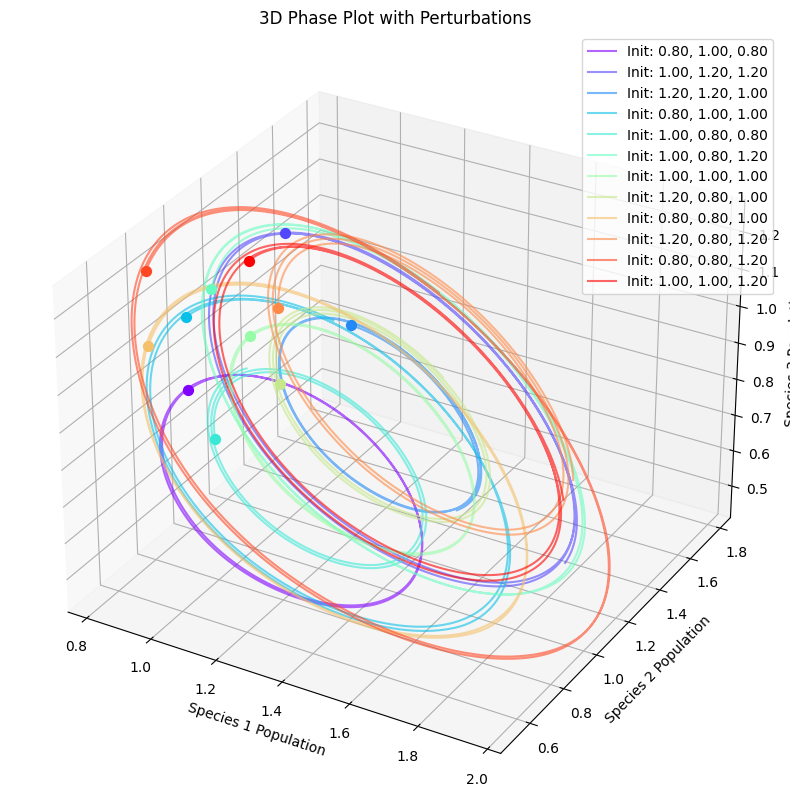

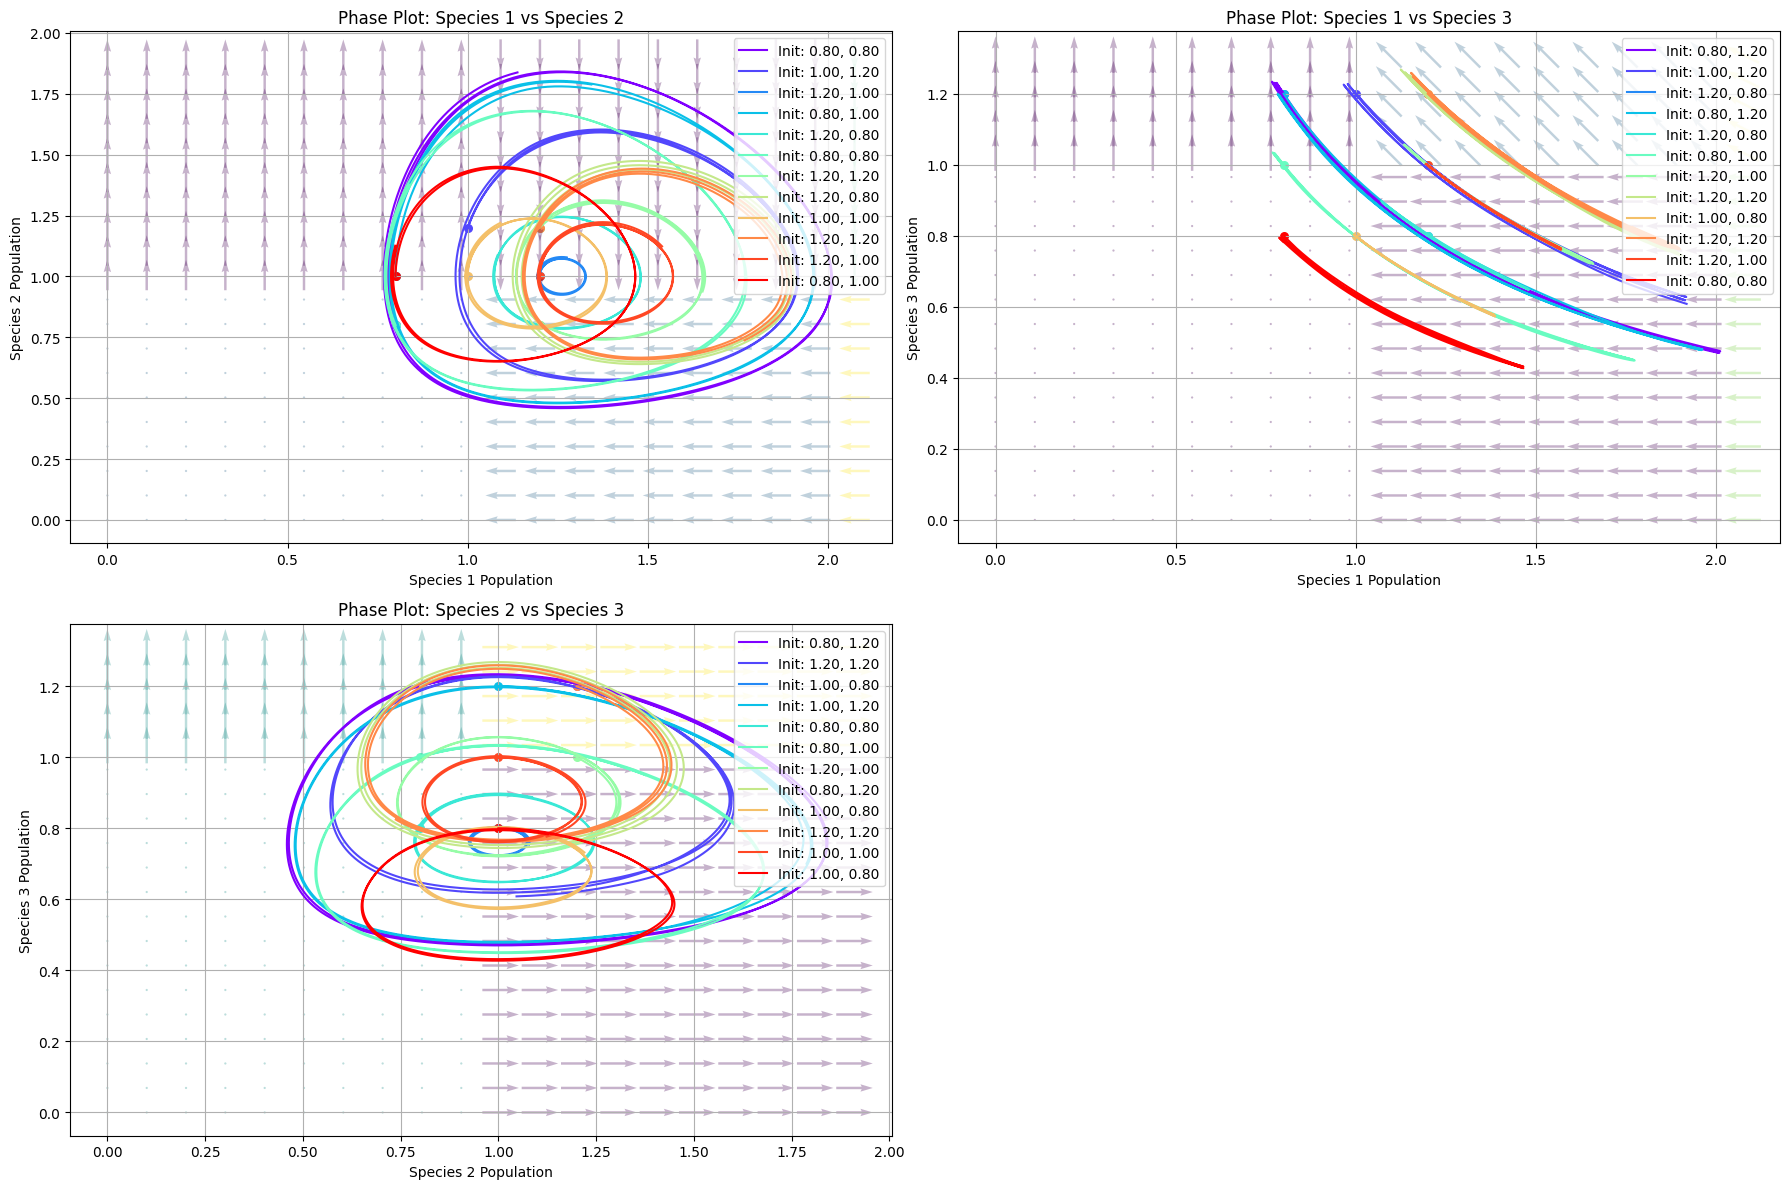

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/2768500624.py:25: RuntimeWarning: invalid value encountered in divide
  U, V, W = U/norm, V/norm, W/norm


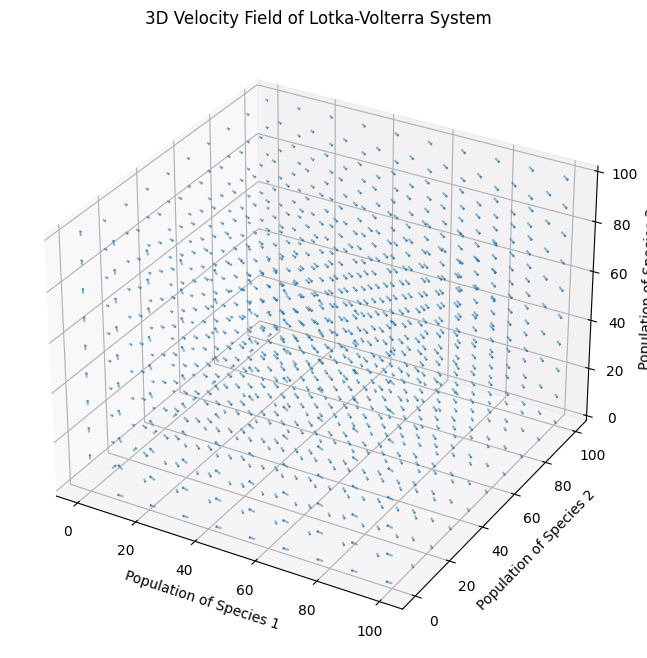

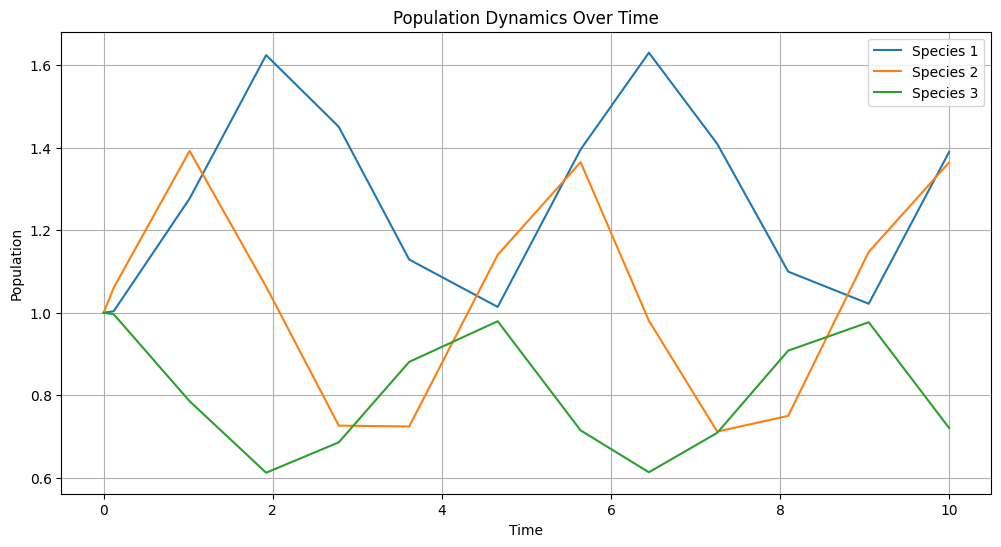

In [34]:
interaction_matrix = np.array([[0,  1, 0], 
                              [-1, 0,  1],
                              [0,   -1, 0]])

initial_populations = [1,1,1]
growth_rates = [-1, .5, 1] 
t_span = (0, 10) 
t_eval = np.linspace(0, 10, 10)
population_range = (0, 100)

plot_pop_phase(interaction_matrix, initial_populations, growth_rates, t_span, epsilon=.2)

Now we plot the trajectories of the solutions to the same system, but this time for a longer time horizon. We can see that the trajectories display more and more chaotic orbits.

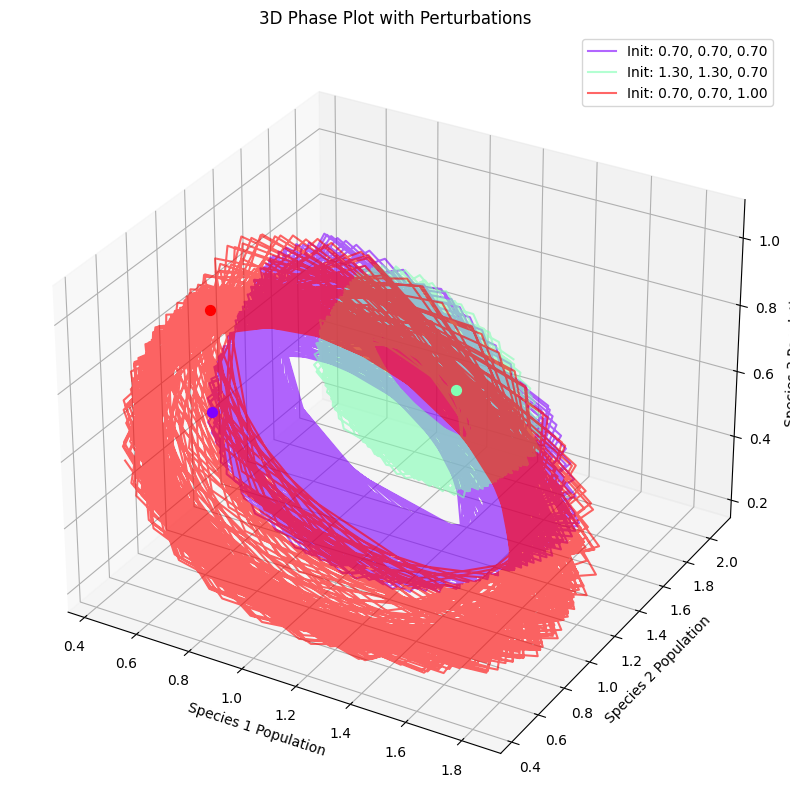

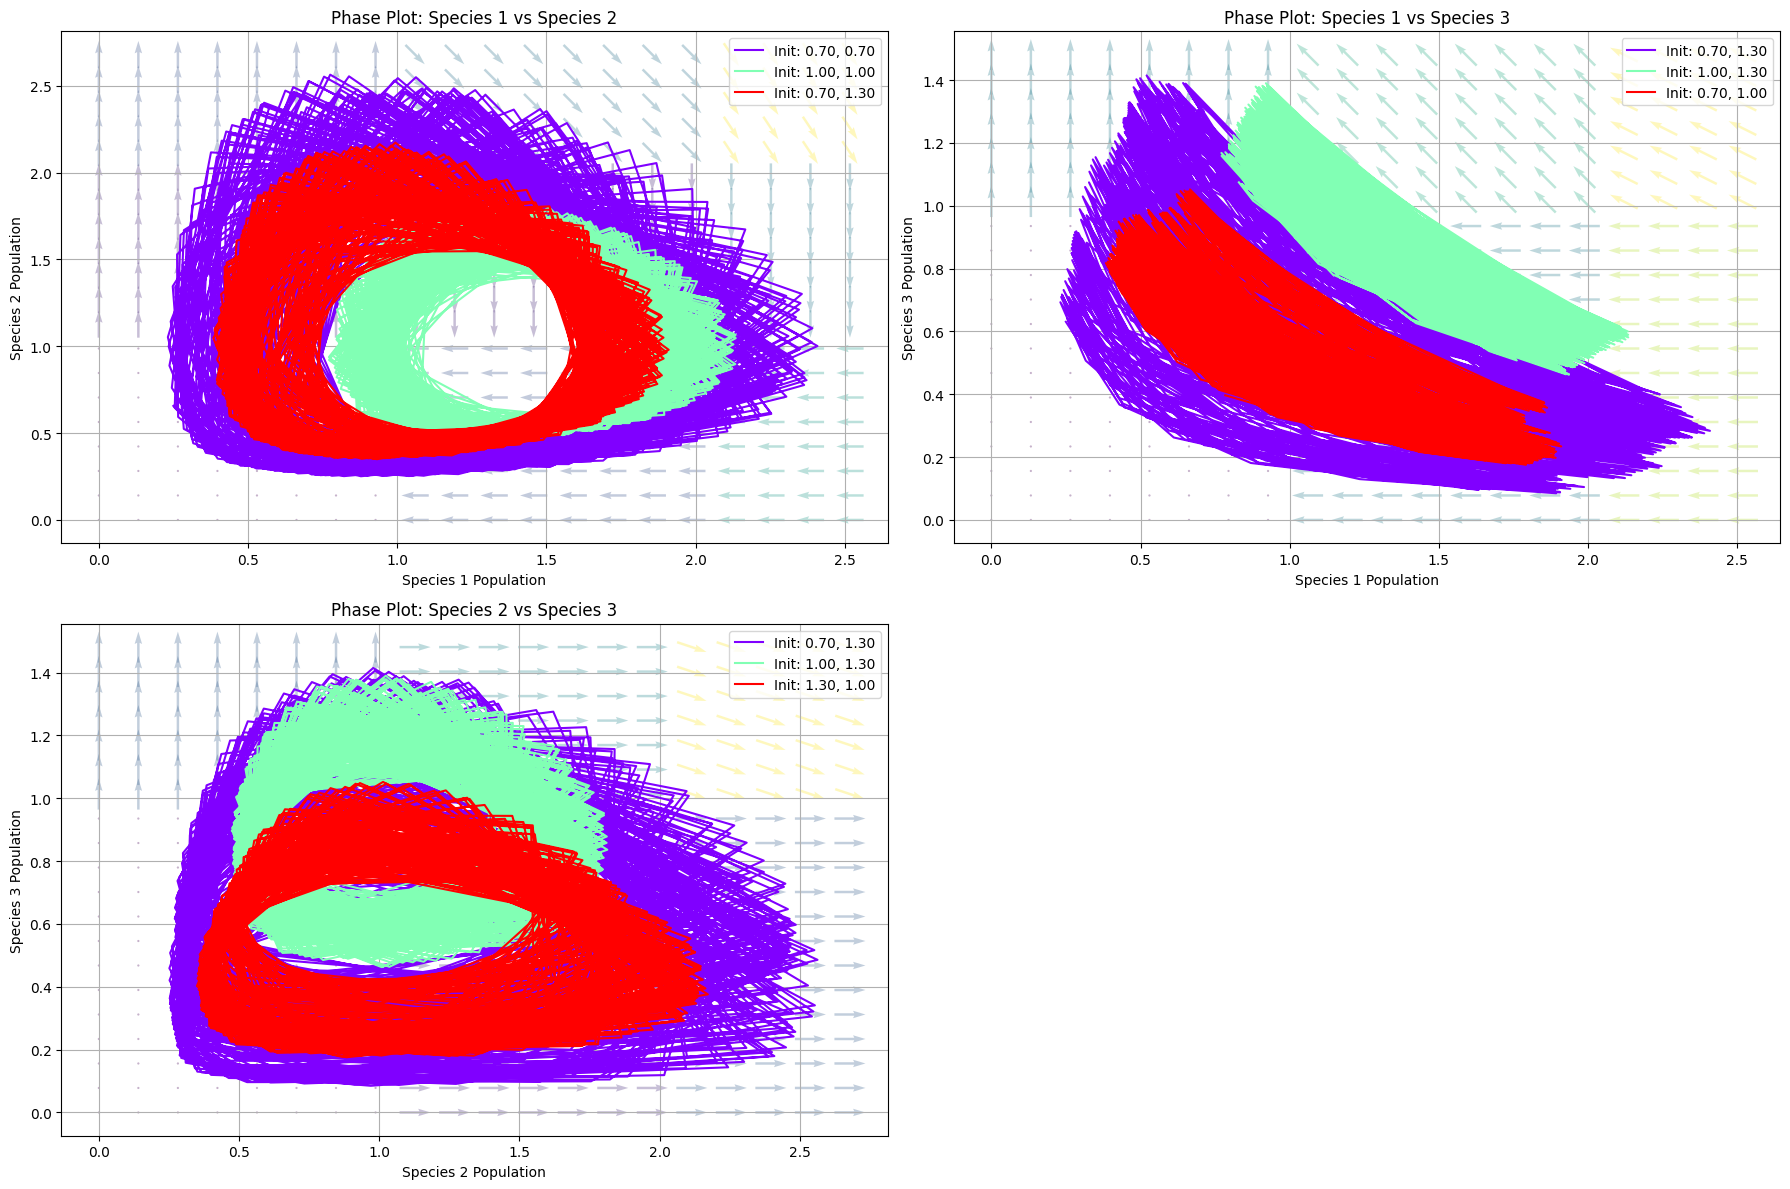

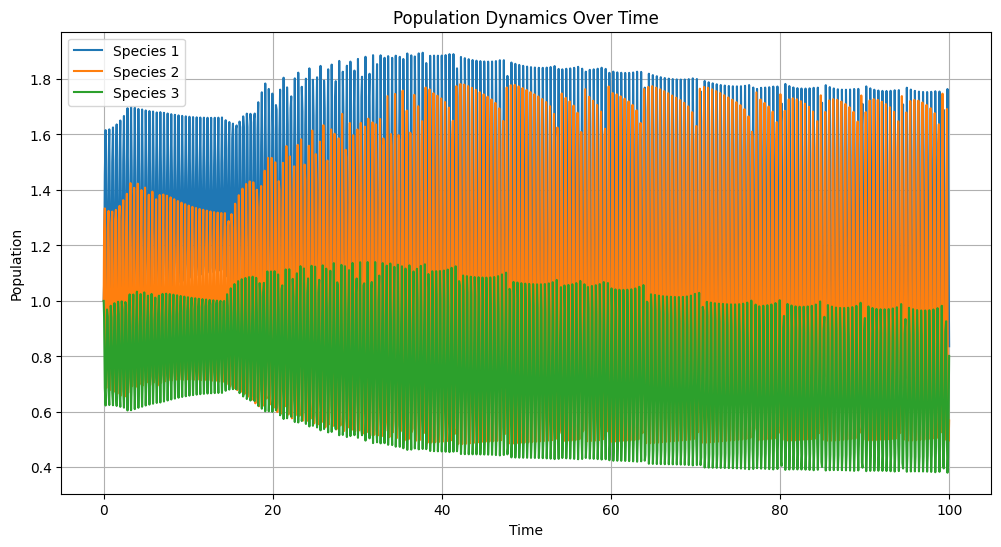

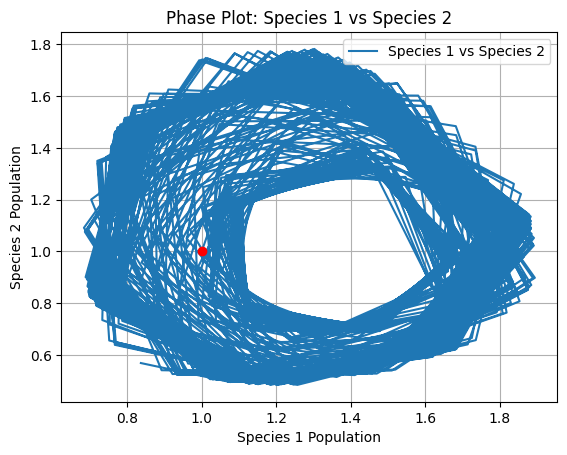

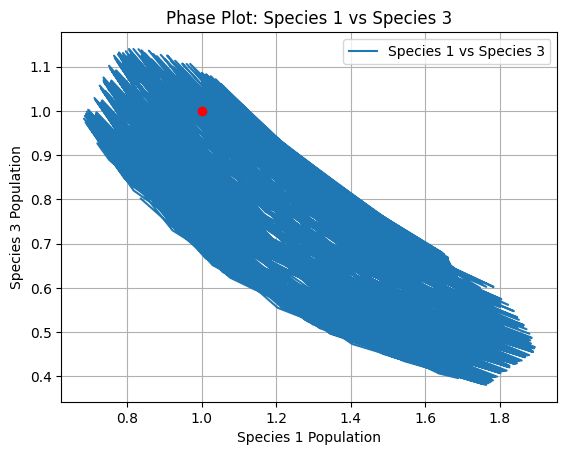

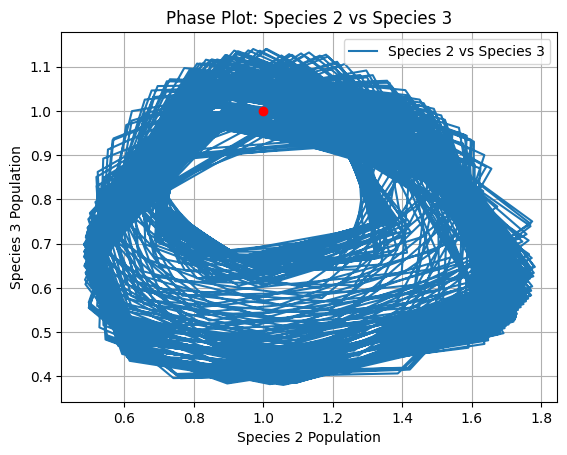

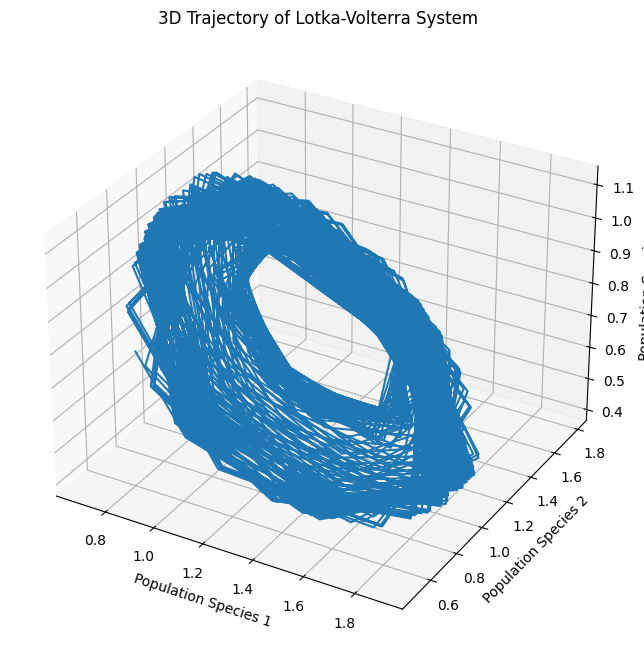

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/2768500624.py:25: RuntimeWarning: invalid value encountered in divide
  U, V, W = U/norm, V/norm, W/norm


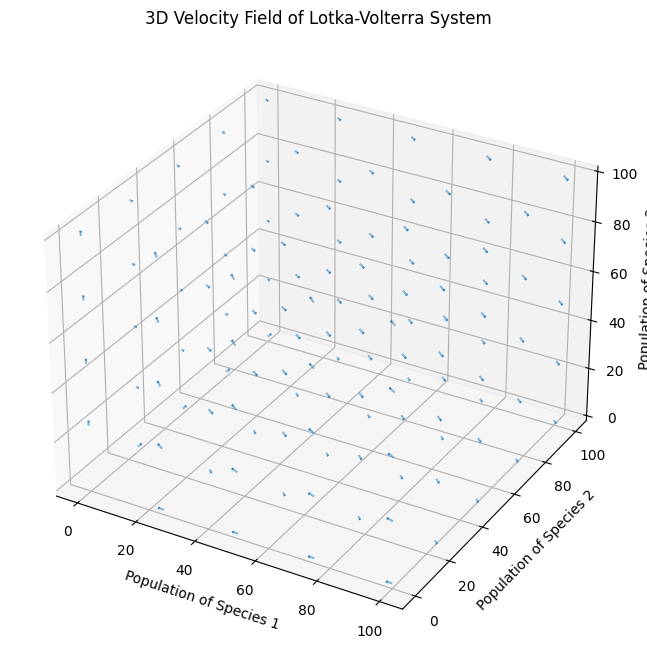

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/881093198.py:38: RuntimeWarning: invalid value encountered in divide
  U /= magnitude
/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/881093198.py:39: RuntimeWarning: invalid value encountered in divide
  V /= magnitude


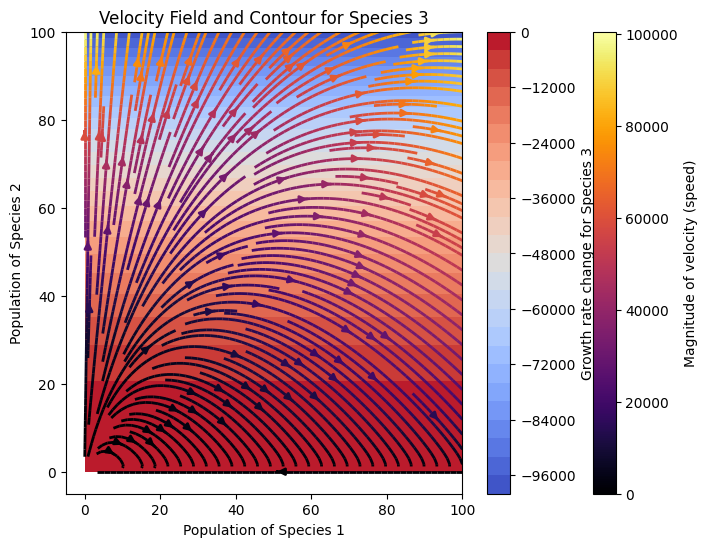

In [36]:
interaction_matrix = np.array([[0,  10, 0], 
                              [-10, 0,  10],
                              [0,   -10, 0]])

initial_populations = [1,1,1]
growth_rates = [-10, 5, 10] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 100)

run_lv_full_analysis(interaction_matrix, initial_populations, growth_rates, t_span, population_range=population_range, num_perturbations=3, epsilon=.3)

## Fixed Points

We divide the fixed points of the model into 4 categories:
- **Trivial**: $x_1 = x_2 = x_3 = 0$
- **Single Species**: $x_i>0$ and $x_j = 0, \forall j \neq i$
- **Two Species**: $x_i=0$ and $x_j > 0, \forall j \neq i$
- **Interior Points**: $x_i > 0, \forall i$

The first two cases are trivial, and we skip their analysis.

### One Species Fixed Point
With one species, we have the following equation:
$ \frac{{dx_i}}{{dt}} = x_ig_i + A_{ii}x_i^2 = 0 $. By rearraning the terms, we derive $x_i=-g_i/A_{ii}$. The stability of the fixed point depends on the sign of the derivative of f.

#### Stable

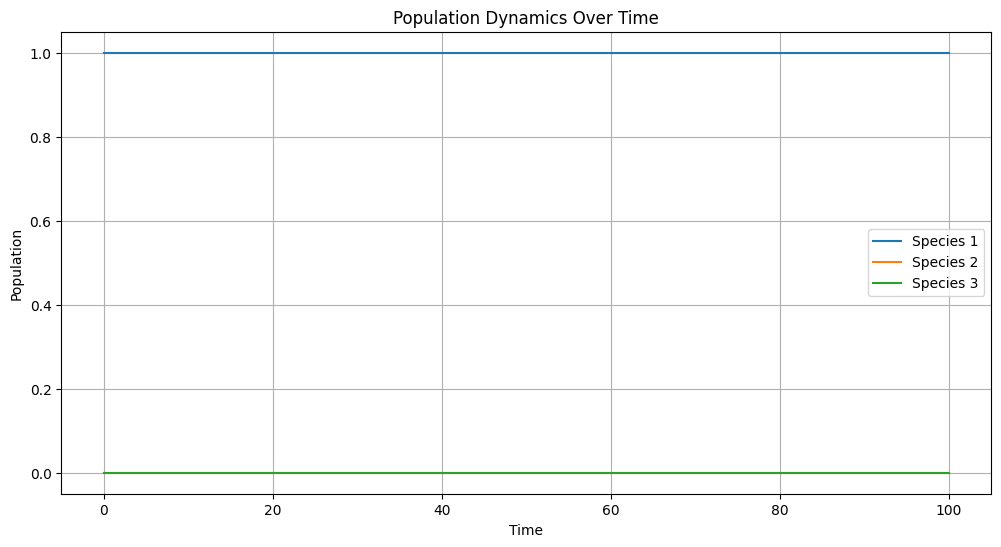

In [13]:
interaction_matrix = np.array([[-1,  0, 0], 
                              [0, 0,  0],
                              [0,   0, 0]])

initial_populations = [1,0,0]
growth_rates = [1, 0, 0] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, only_pop=True)

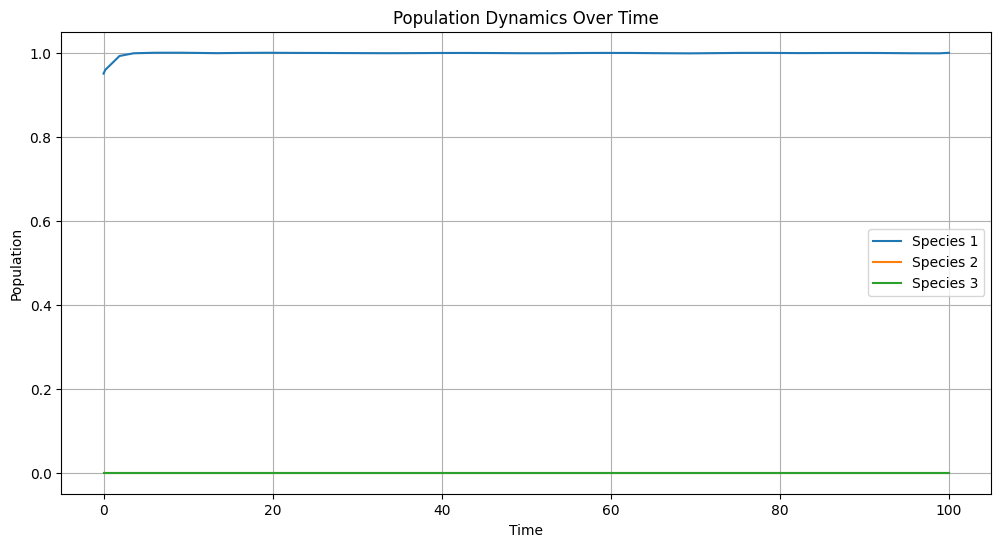

In [14]:
interaction_matrix = np.array([[-1,  0, 0], 
                              [0, 0,  0],
                              [0,   0, 0]])

initial_populations = [.95,0,0]
growth_rates = [1, 0, 0] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, only_pop=True)

#### Unstable

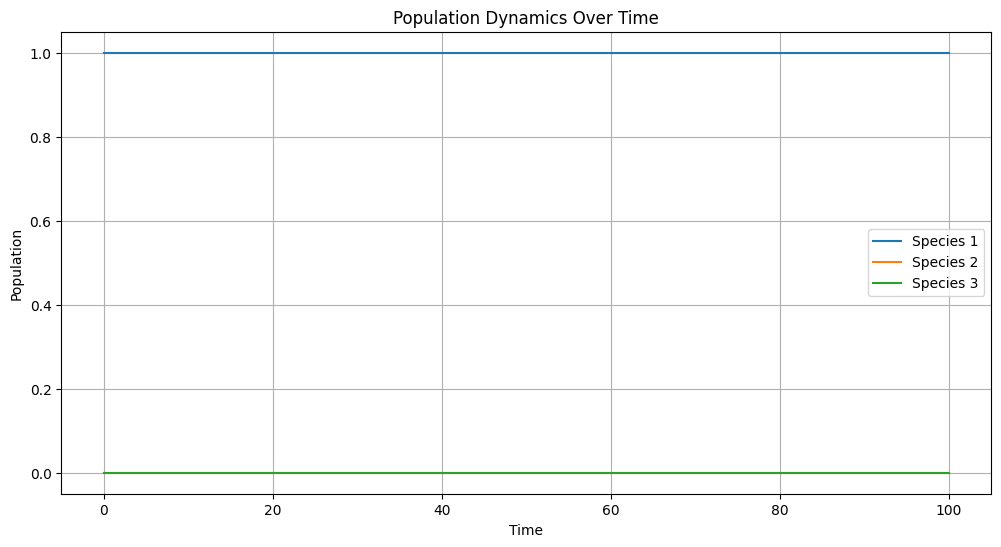

In [15]:
interaction_matrix = np.array([[1,  0, 0], 
                              [0, 0,  0],
                              [0,   0, 0]])

initial_populations = [1,0,0]
growth_rates = [-1, 0, 0] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, only_pop=True)

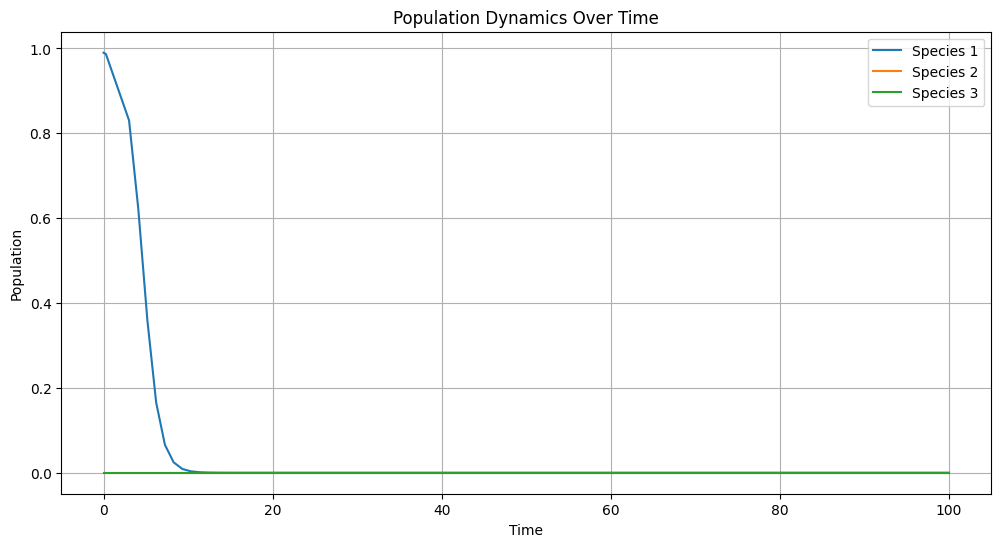

In [16]:
interaction_matrix = np.array([[1,  0, 0], 
                              [0, 0,  0],
                              [0,   0, 0]])

initial_populations = [.99,0,0]
growth_rates = [-1, 0, 0] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, only_pop=True)


### Two Species Fixed Points
WLOG, let $x_3=0$. We then have a two population Lotke-Volterra system.

$$
\begin{align*} \frac{{dx_1}}{{dt}} &= x_1 \left( g_1 + A_{11}x_1 + A_{12}x_2 \right) \\ 

\frac{{dx_2}}{{dt}} &= x_2 \left( g_2 + A_{21}x_1 + A_{22}x_2 \right) \\
\end{align*}
$$

To find the fixed points of the given system of ODEs, we need to solve for the values of $x_1$ and $x_2$ such that both $\frac{{dx_1}}{{dt}}$ and $\frac{{dx_2}}{{dt}}$ are equal to zero.

Setting $\frac{{dx_1}}{{dt}} = 0$, we have:

$$ x_1 \left( g_1 + A_{11}x_1 + A_{12}x_2 \right) = 0 $$

This equation can be satisfied either when $x_1 = 0$ or when the term inside the parentheses equals zero. For the case $x_1 = 0$, the value of $x_2$ can be arbitrary.

When the term inside the parentheses equals zero, we have:

$$ g_1 + A_{11}x_1 + A_{12}x_2 = 0 $$

Solving this equation for $x_2$, we get:

$$ x_2 = \frac{{-g_1 - A_{11}x_1}}{{A_{12}}} $$

Similarly, for $\frac{{dx_2}}{{dt}} = 0$, we have:

$$ x_2 \left( g_2 + A_{21}x_1 + A_{22}x_2 \right) = 0 $$

Again, since $x_2$ cannot be zero, the term inside the parentheses must equal zero:

$$ g_2 + A_{21}x_1 + A_{22}x_2 = 0 $$

Solving this equation for $x_1$, we get:

$$ x_1 = \frac{{-g_2 - A_{22}x_2}}{{A_{21}}} $$

Therefore, the fixed points of the system are given by the pairs $(x_1, x_2)$ that satisfy the simultaneous equations derived above.


To analyze the stability of the fixed point, we need to examine the behavior of the system around the fixed point. We can do this by investigating the eigenvalues of the Jacobian matrix evaluated at the fixed point.

The Jacobian matrix for the given system of ODEs is defined as:

$$J = \begin{bmatrix} \frac{{\partial \frac{{dx_1}}{{dt}}}}{{\partial x_1}} & \frac{{\partial \frac{{dx_1}}{{dt}}}}{{\partial x_2}} \\ \frac{{\partial \frac{{dx_2}}{{dt}}}}{{\partial x_1}} & \frac{{\partial \frac{{dx_2}}{{dt}}}}{{\partial x_2}} \end{bmatrix}$$

Evaluating the Jacobian matrix at the fixed point, where $\frac{{dx_1}}{{dt}} = 0$ and $\frac{{dx_2}}{{dt}} = 0$, we have:

$$J = \begin{bmatrix} g_1 + 2A_{11}x_1 + A_{12}x_2 & A_{12}x_1 \\ A_{21}x_2 & g_2 + A_{21}x_1 + 2A_{22}x_2 \end{bmatrix}$$

To determine the stability of the fixed point, we calculate the eigenvalues of the Jacobian matrix $J$ and analyze their real parts. If all eigenvalues have negative real parts, the fixed point is stable. However, if at least one eigenvalue has a positive real part or there are eigenvalues with zero real parts, the fixed point is unstable or exhibits non-linear behavior.

#### Eigenvalues -1, 1: unstable

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/1104349429.py:40: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim([min_z, max_z])


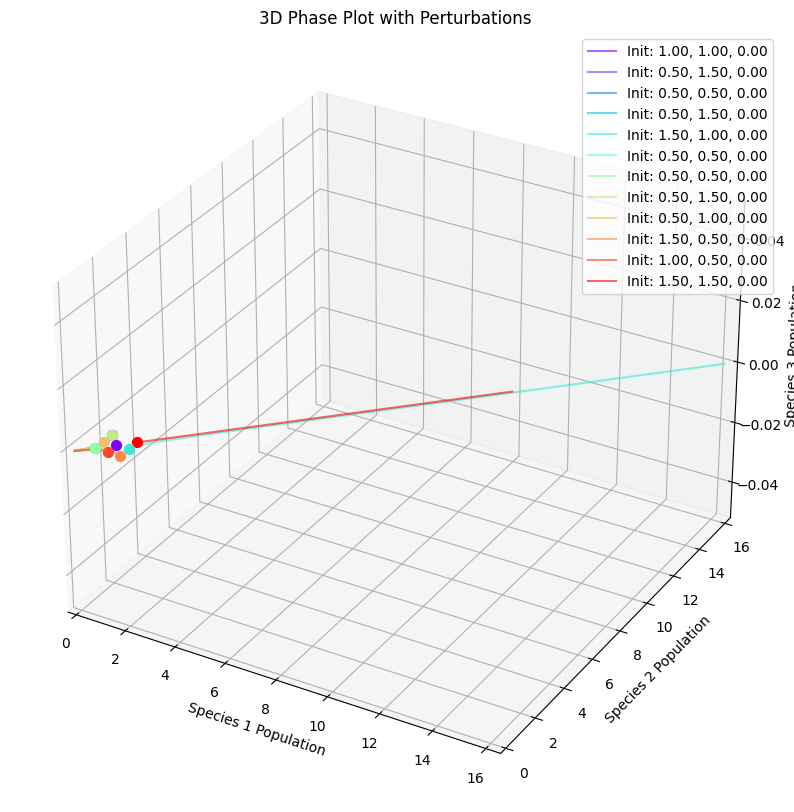

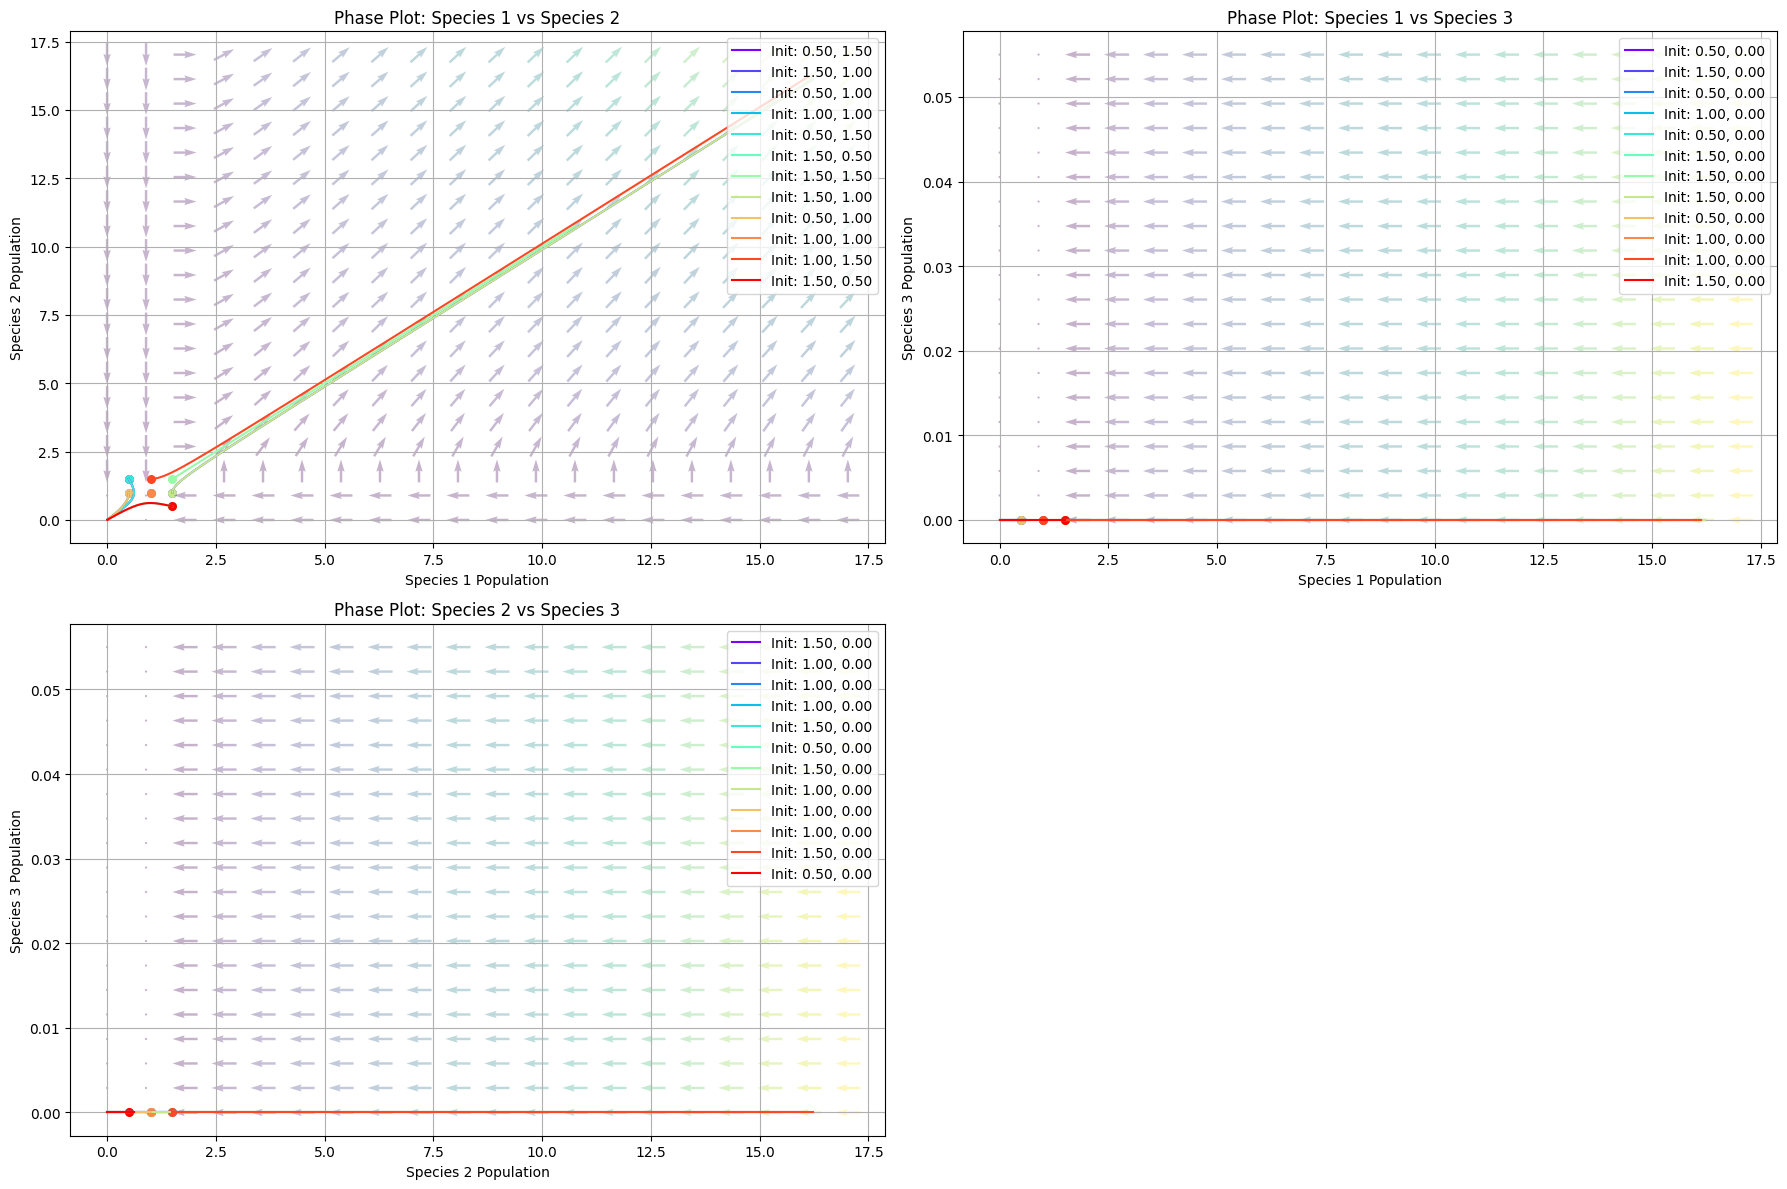

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/2768500624.py:25: RuntimeWarning: invalid value encountered in divide
  U, V, W = U/norm, V/norm, W/norm


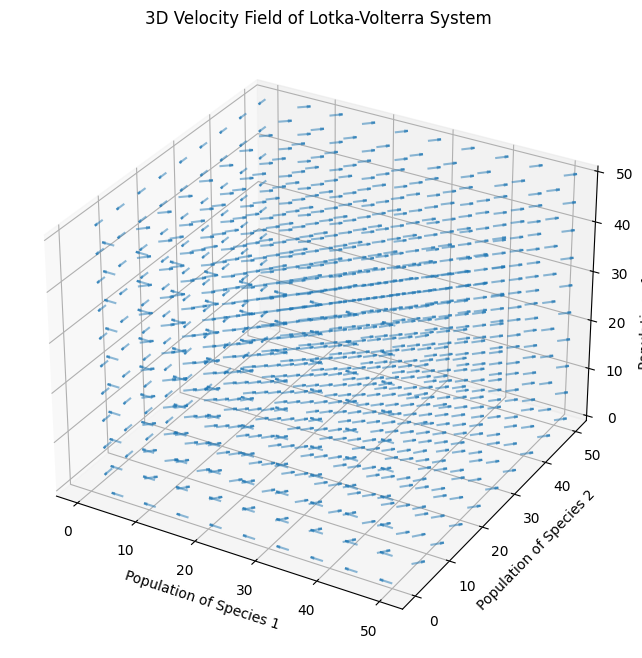

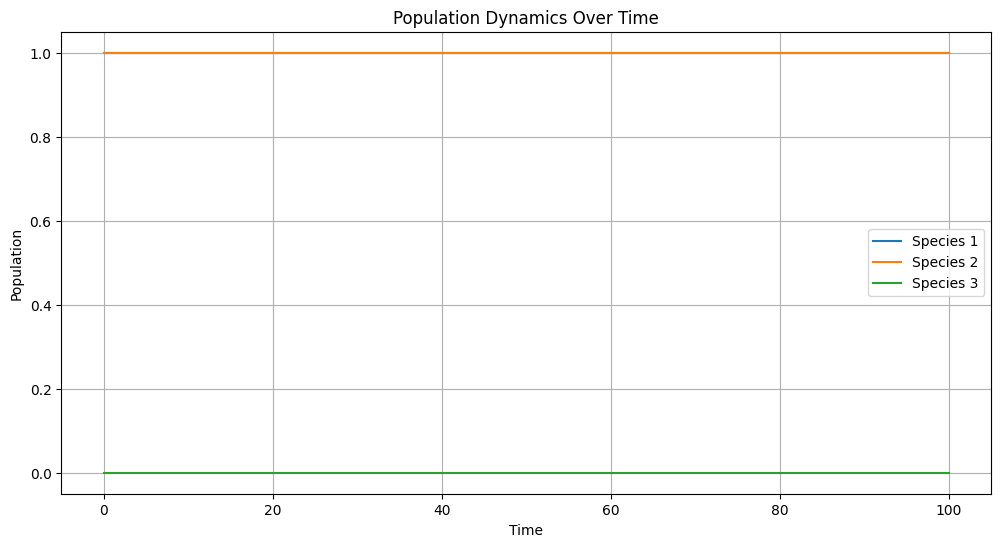

In [17]:
interaction_matrix = np.array([[0,  1, 0], 
                              [1, 0,  0],
                              [0,   0, 0]])

initial_populations = [1,1,0]
growth_rates = [-1, -1, 0] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 50)

plot_pop_phase(interaction_matrix, initial_populations, growth_rates, t_span, epsilon=.5)

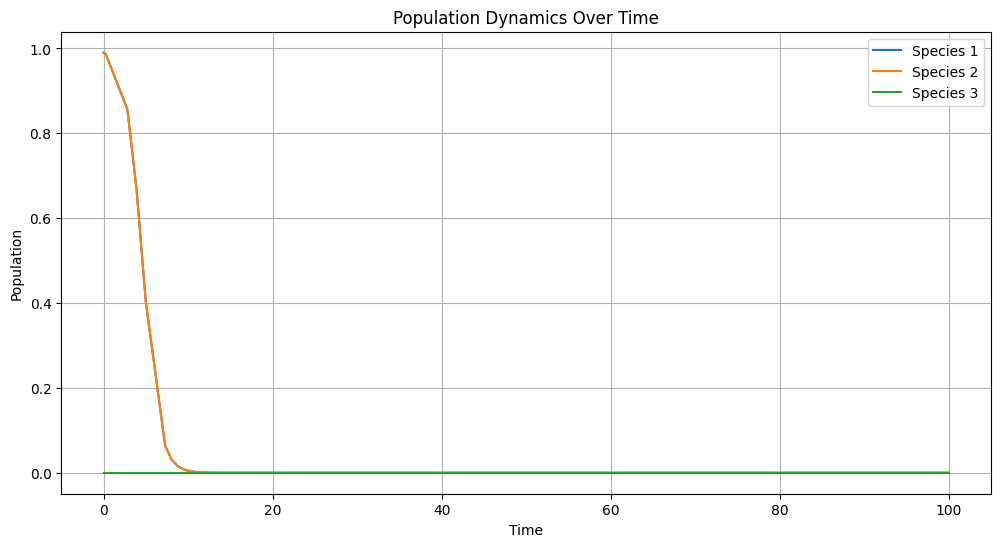

In [18]:
interaction_matrix = np.array([[0,  1, 0], 
                              [1, 0,  0],
                              [0,   0, 0]])

initial_populations = [.99, .99,0]
growth_rates = [-1, -1, 0] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, t_eval=None, only_pop=True)

#### Eigenvalues 3,1: unstable

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/1104349429.py:40: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim([min_z, max_z])


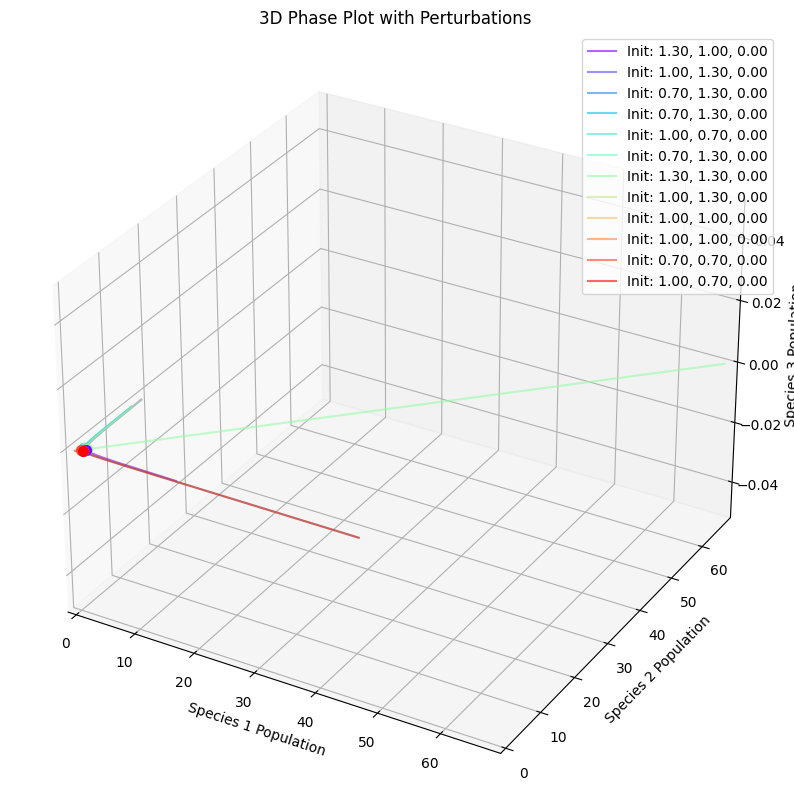

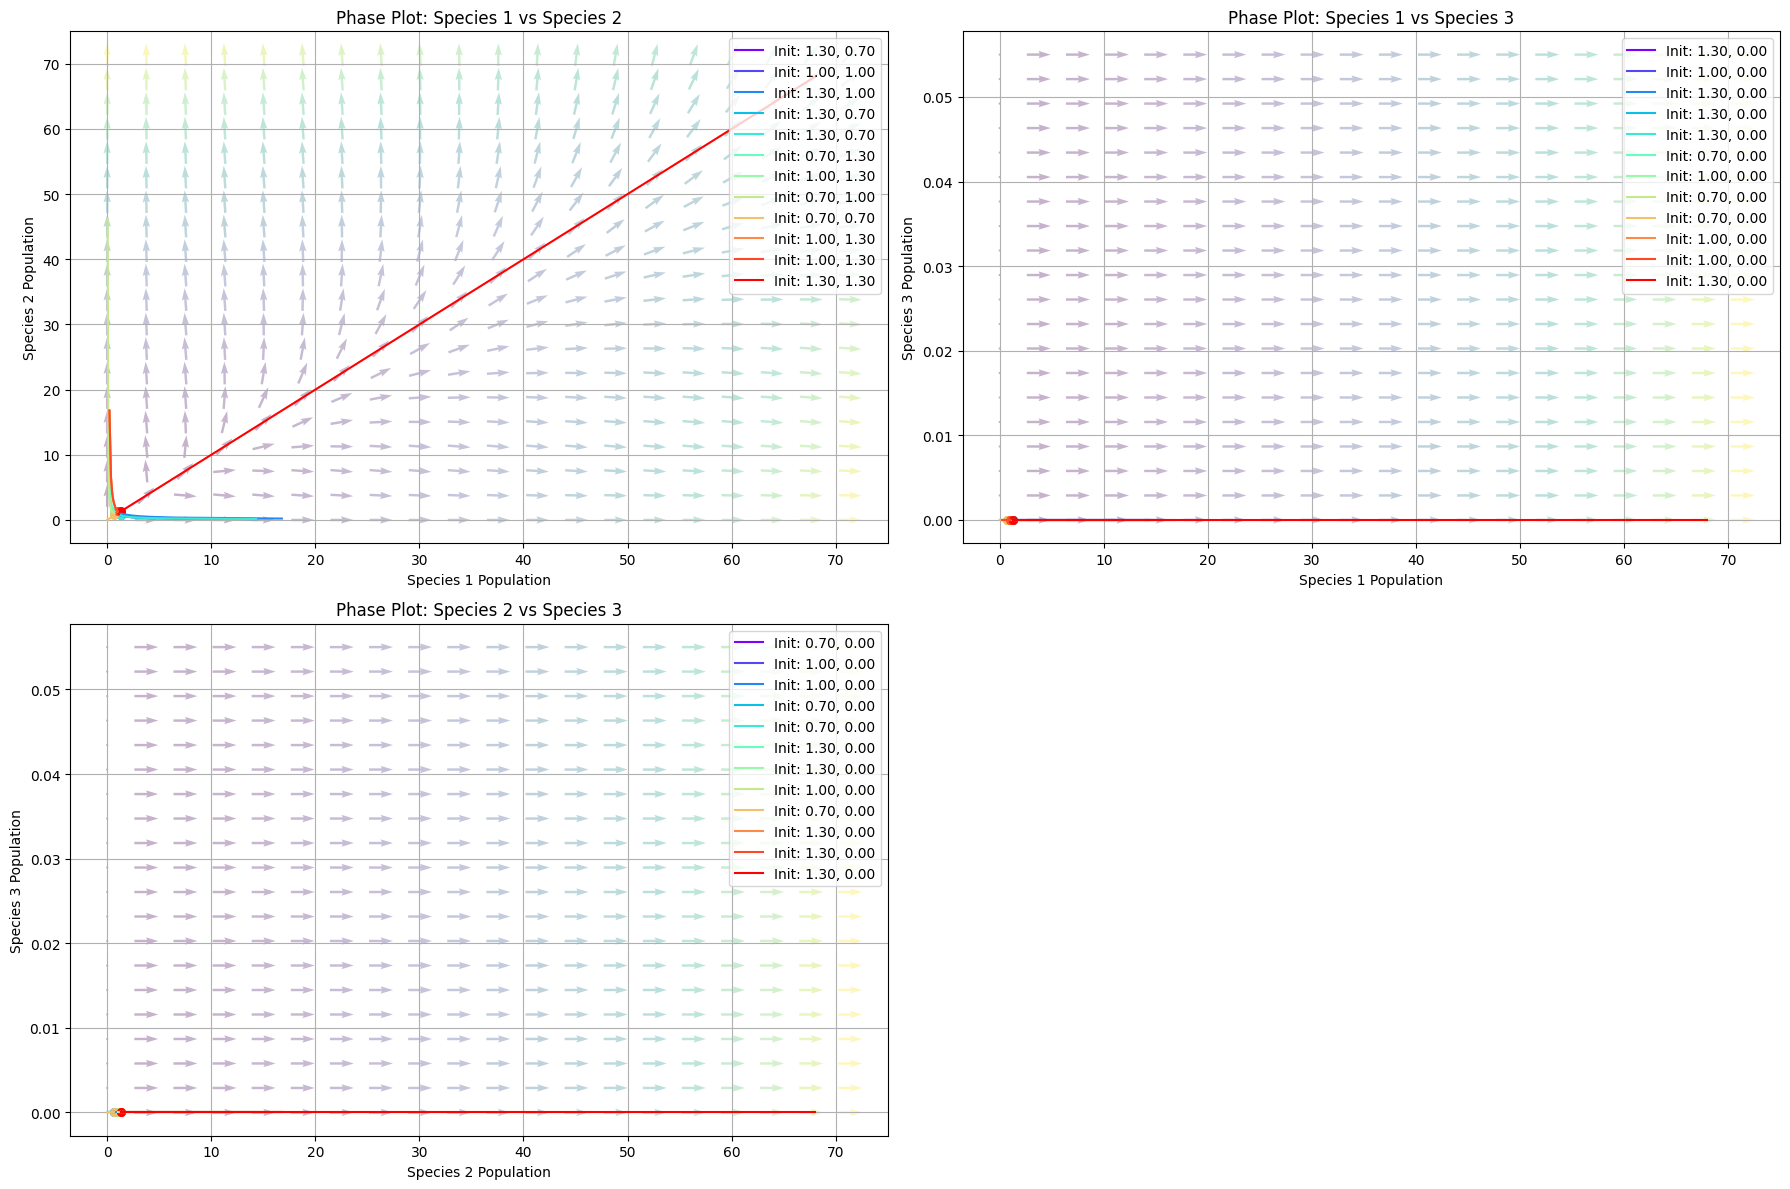

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/2768500624.py:25: RuntimeWarning: invalid value encountered in divide
  U, V, W = U/norm, V/norm, W/norm


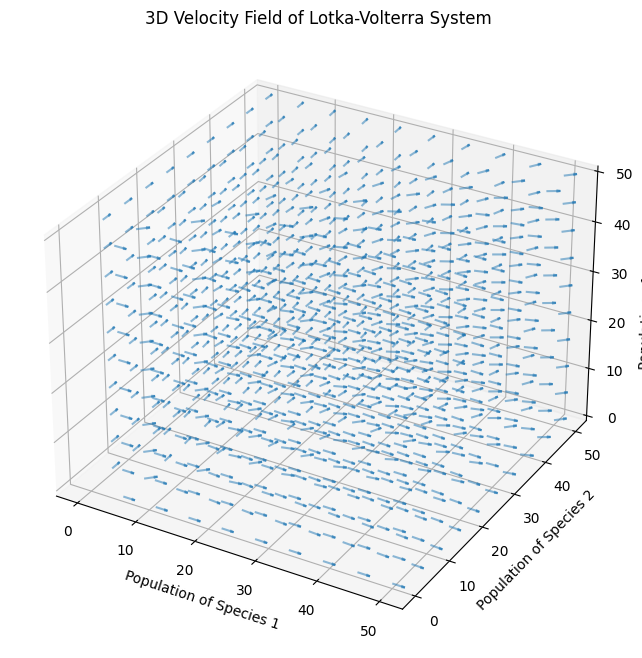

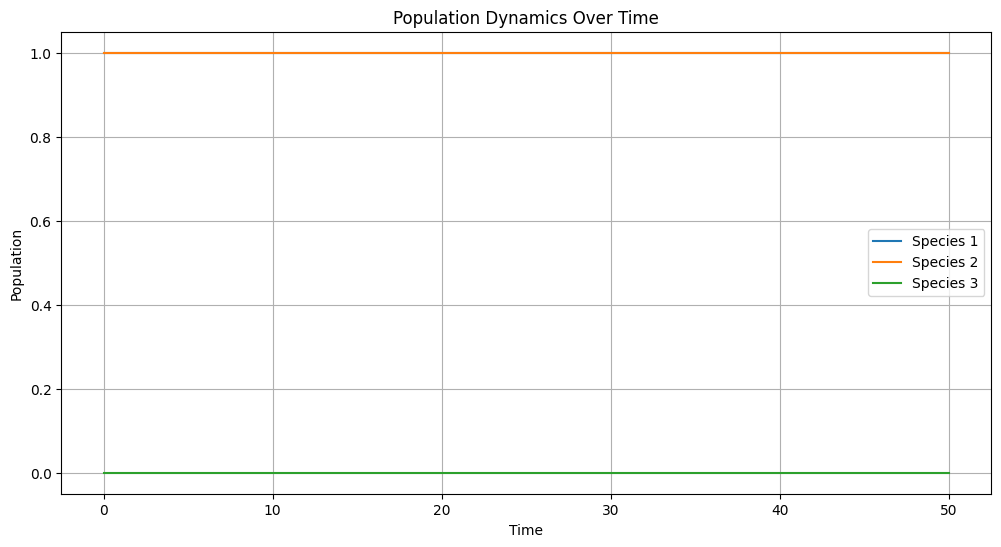

In [19]:
interaction_matrix = np.array([[2,  -1, 0], 
                              [-1, 2,  0],
                              [0,   0, 0]])

initial_populations = [1,1,0]
growth_rates = [-1, -1, 0] 
t_span = (0, 50) 
t_eval = np.linspace(0, 50, 50)
population_range = (0, 50)

plot_pop_phase(interaction_matrix, initial_populations, growth_rates, t_span)

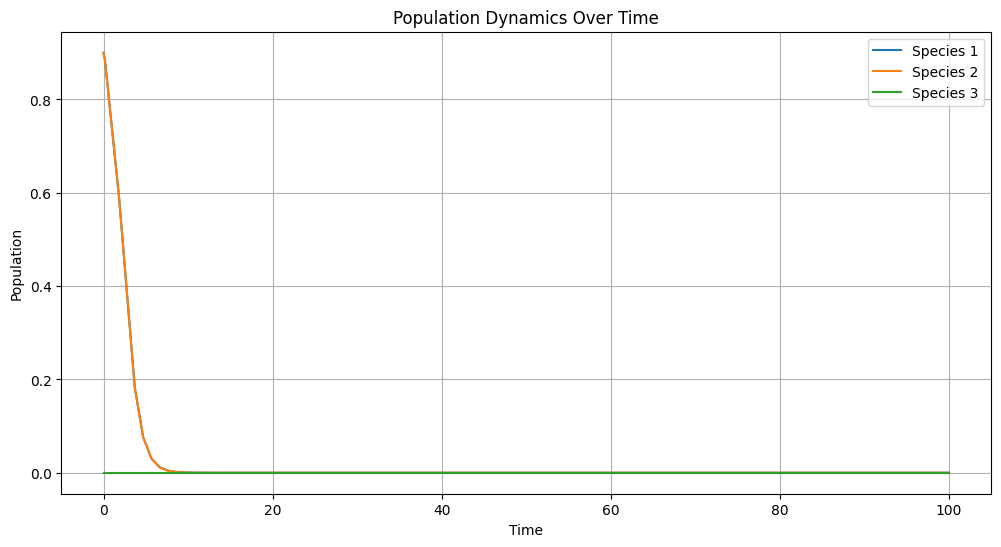

In [20]:
interaction_matrix = np.array([[2,  -1, 0], 
                              [-1, 2,  0],
                              [0,   0, 0]])

initial_populations = [.9,.9, 0]
growth_rates = [-1, -1, 0] 
t_span = (0, 100) 
t_eval = np.linspace(0, 100, 100)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, t_eval=None, only_pop=True)

#### Oscillations (Limit Cycles)

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/1104349429.py:40: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim([min_z, max_z])


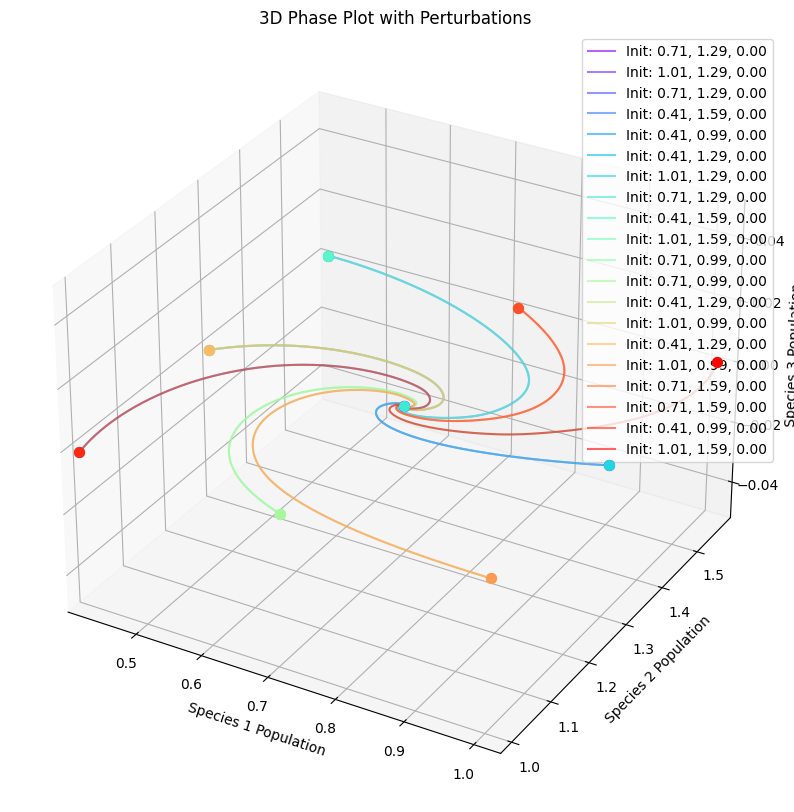

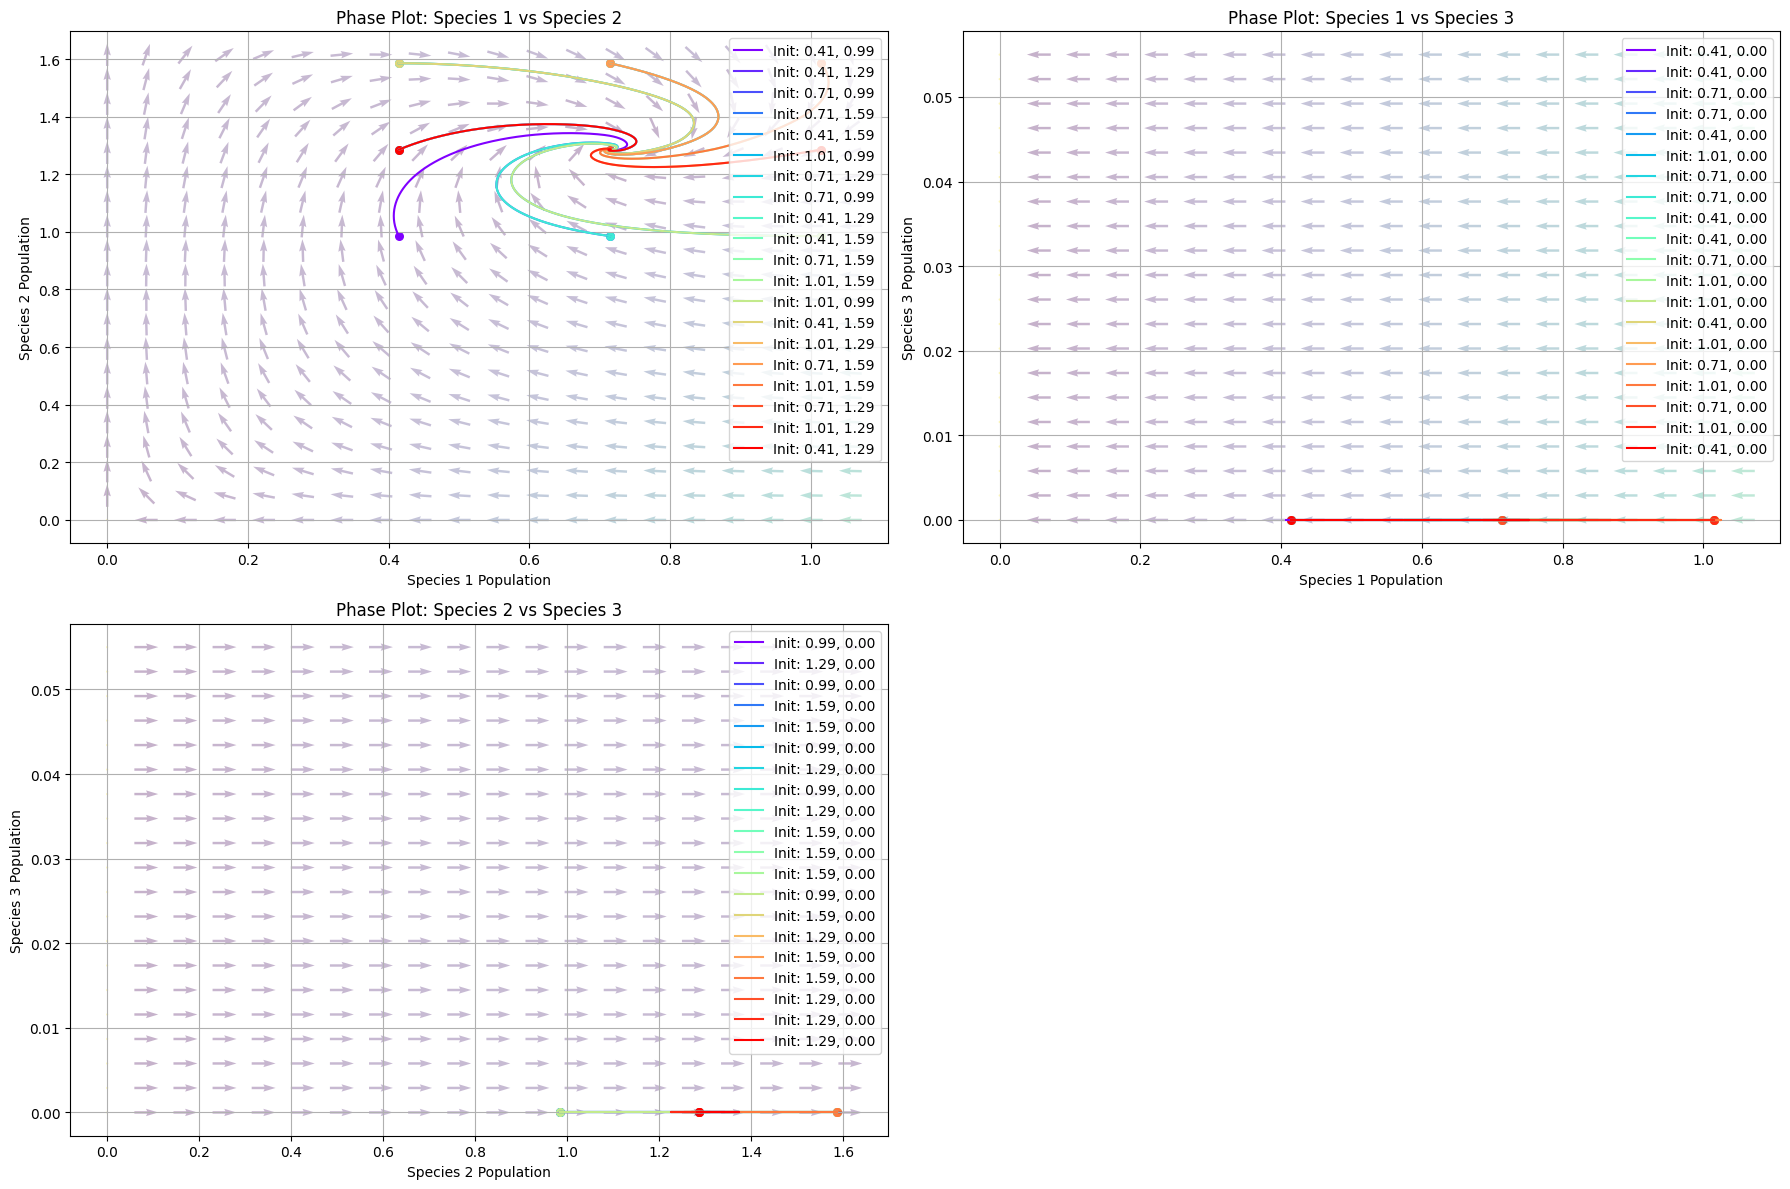

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/2768500624.py:25: RuntimeWarning: invalid value encountered in divide
  U, V, W = U/norm, V/norm, W/norm


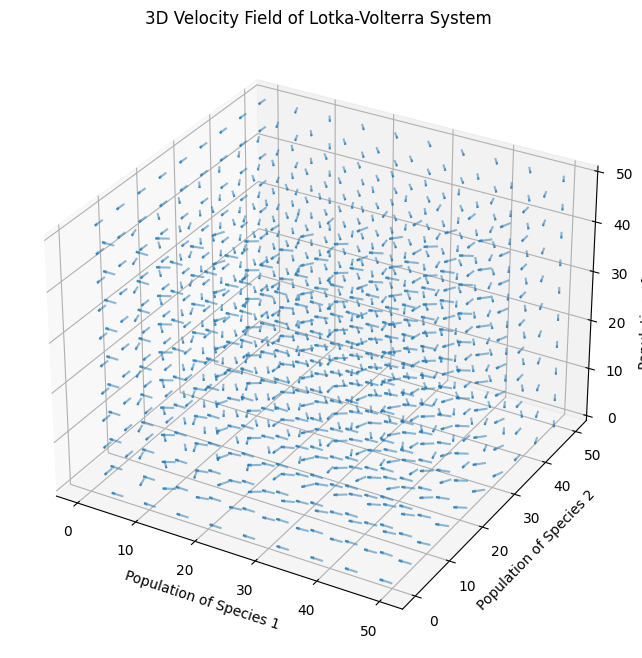

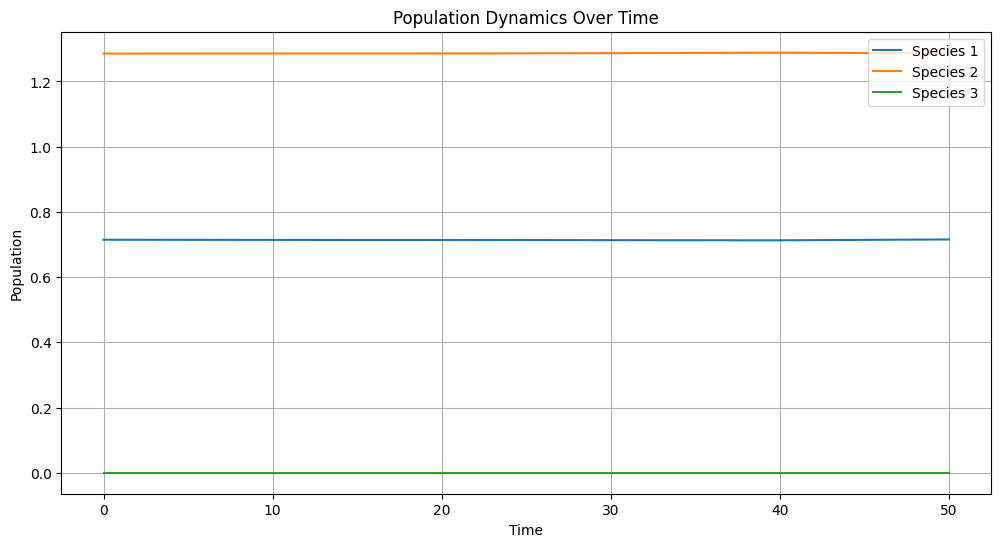

In [31]:
interaction_matrix = np.array([[-.3,  .4, 0], 
                              [-.1,  -.1, 0],
                              [0,   0, 0]])

initial_populations = [.7145,1.2853,0]
growth_rates = [-.3, .2, 0] 
t_span = (0, 50)
t_eval = np.linspace(0, 50, 50)
population_range = (0, 50)

plot_pop_phase(interaction_matrix, initial_populations, growth_rates, t_span, num_perturbations=20)

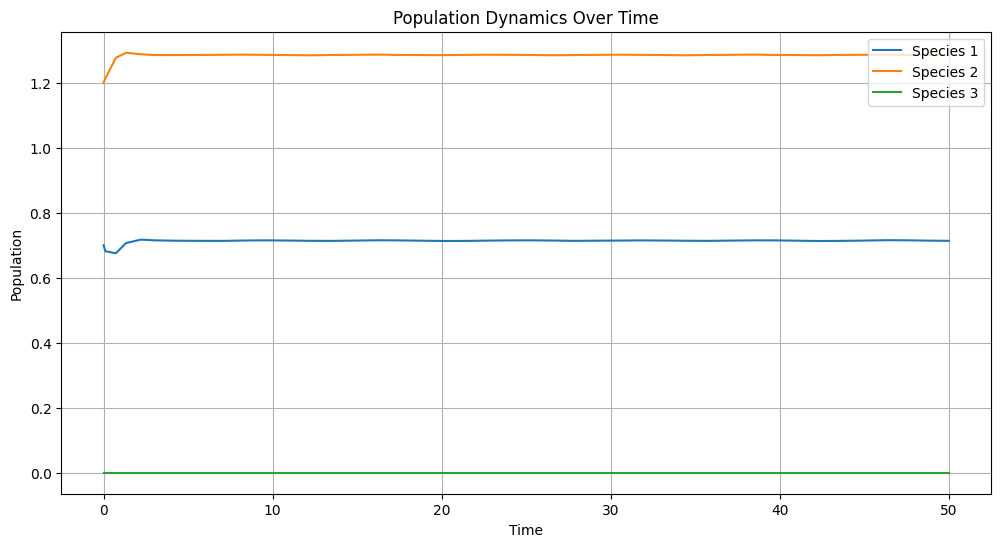

In [22]:
interaction_matrix = np.array([[-3,  4, 0], 
                              [-1,  -1, 0],
                              [0,   0, 0]])

initial_populations = [.7,1.2,0]
growth_rates = [-3, 2, 0] 
t_span = (0, 50) 
t_eval = np.linspace(0, 50, 50)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, t_eval=None, only_pop=True)

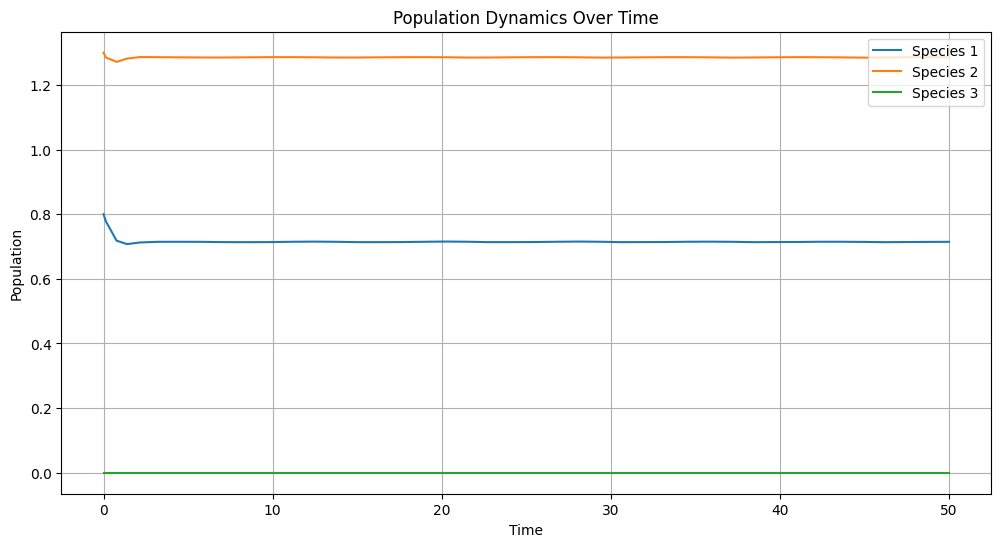

In [23]:
interaction_matrix = np.array([[-3,  4, 0], 
                              [-1,  -1, 0],
                              [0,   0, 0]])

initial_populations = [.8,1.3,0]
growth_rates = [-3, 2, 0] 
t_span = (0, 50) 
t_eval = np.linspace(0, 50, 50)
population_range = (0, 50)

plot_population_phase(interaction_matrix, initial_populations, growth_rates, t_span, t_eval=None, only_pop=True)

### Interior Points

We now consider the full three-species Lotka-Volterra system without setting any population to zero.

This results in the simultaneous equations:

$$ \begin{align*} x_1 \left( g_1 + A_{11}x_1 + A_{12}x_2 + A_{13}x_3 \right) &= 0, \\ x_2 \left( g_2 + A_{21}x_1 + A_{22}x_2 + A_{23}x_3 \right) &= 0, \\ x_3 \left( g_3 + A_{31}x_1 + A_{32}x_2 + A_{33}x_3 \right) &= 0. \end{align*} $$


$$ \begin{align*} g_1 + A_{11} x_1^* + A_{12} x_2^* + A_{13} x_3^* &= 0, \\ g_2 + A_{21} x_1^* + A_{22} x_2^* + A_{23} x_3^* &= 0, \\ g_3 + A_{31} x_1^* + A_{32} x_2^* + A_{33} x_3^* &= 0. \end{align*} $$

Solving this system of linear equations provides the values the equilibria.

Again, analyzing the stability of these equilibrium points involves evaluating the eigenvalues of the Jacobian matrix at $(x_1^, x_2^, x_3^*)$. The Jacobian matrix $J$ is derived from the partial derivatives of the system:

$$ J = \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \frac{\partial f_1}{\partial x_3} \\ \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \frac{\partial f_2}{\partial x_3} \\ \frac{\partial f_3}{\partial x_1} & \frac{\partial f_3}{\partial x_2} & \frac{\partial f_3}{\partial x_3} \end{bmatrix}. $$

Evaluating $J$ at the equilibrium point and determining the eigenvalues provides insights into the local stability. If all eigenvalues have negative real parts, the equilibrium is stable; otherwise, it is unstable or exhibits complex dynamics.



#### Eigenvalues 9.597 .49 1.913: unstable

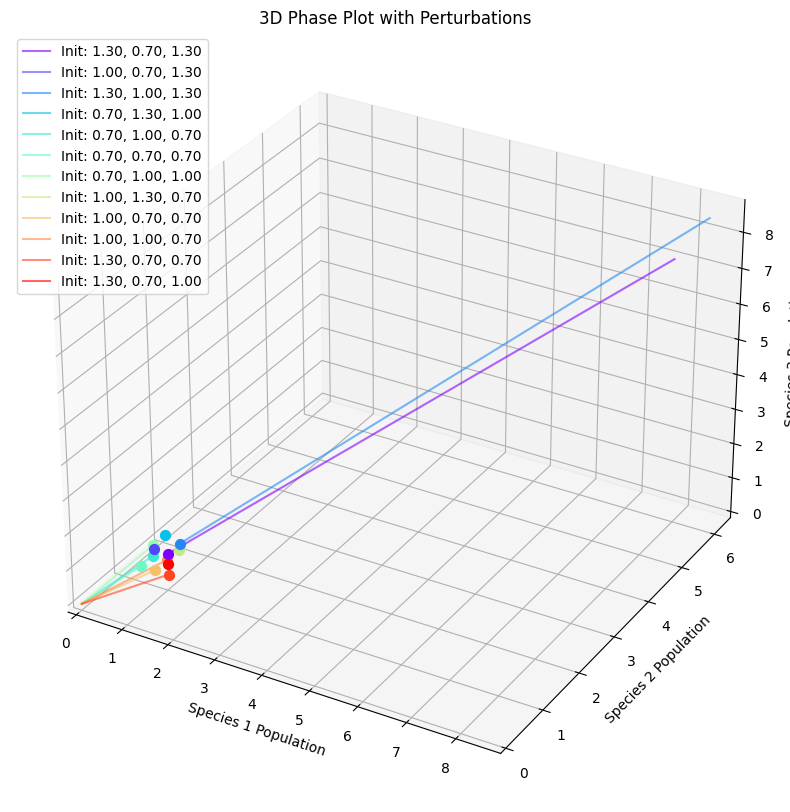

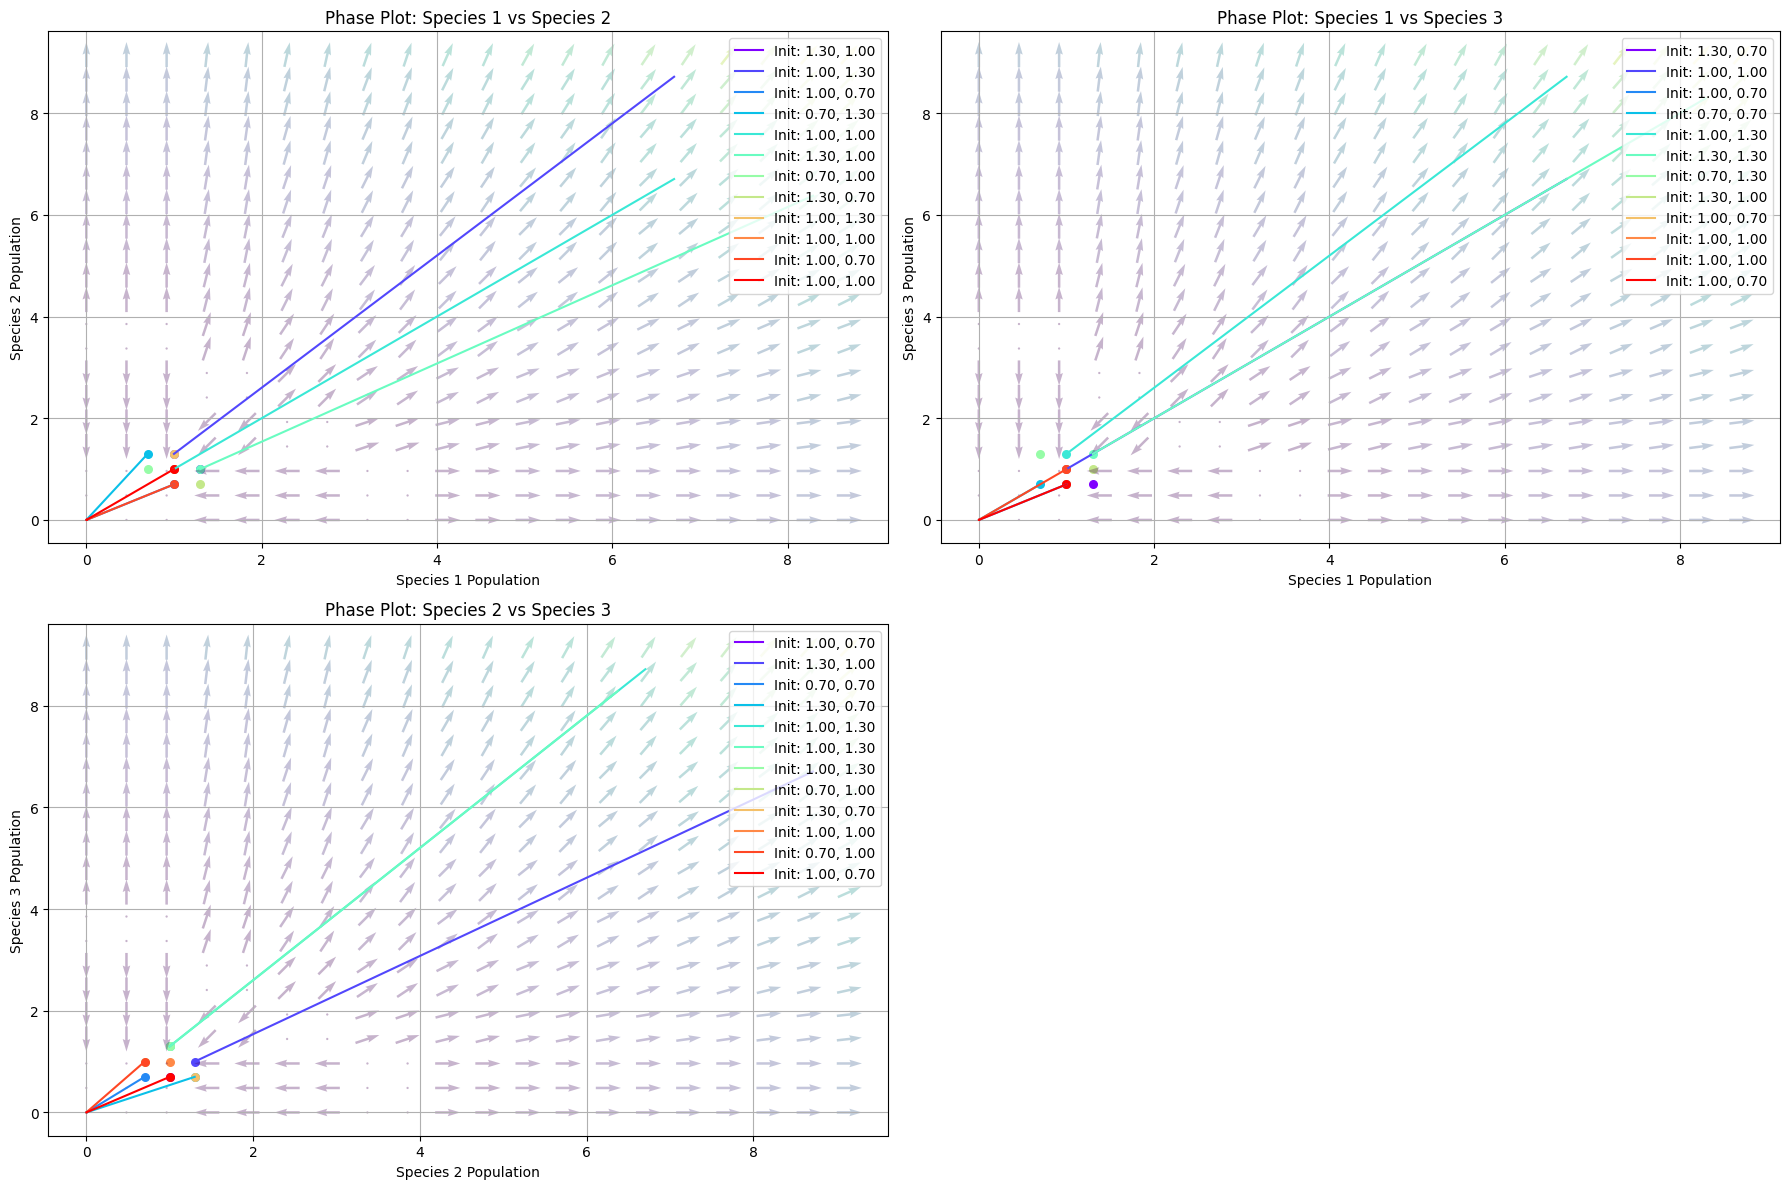

/var/folders/ts/xsr5s4hn2zs46ml6rgb5_42m0000gp/T/ipykernel_17766/2768500624.py:25: RuntimeWarning: invalid value encountered in divide
  U, V, W = U/norm, V/norm, W/norm


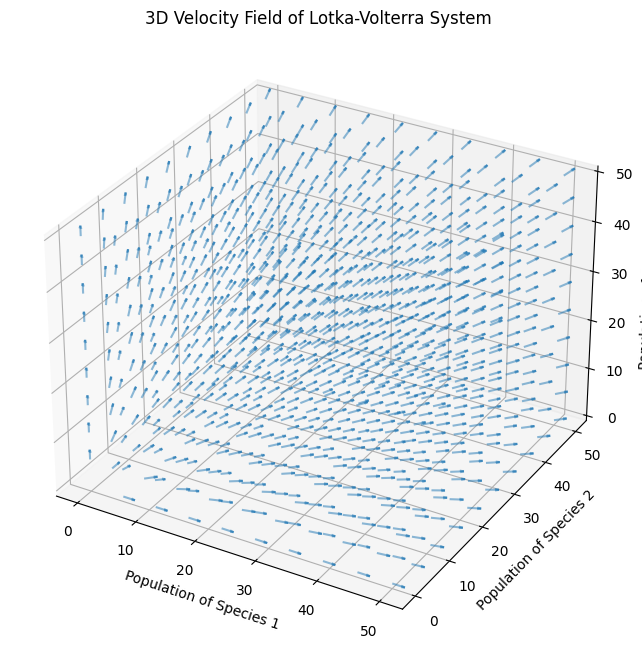

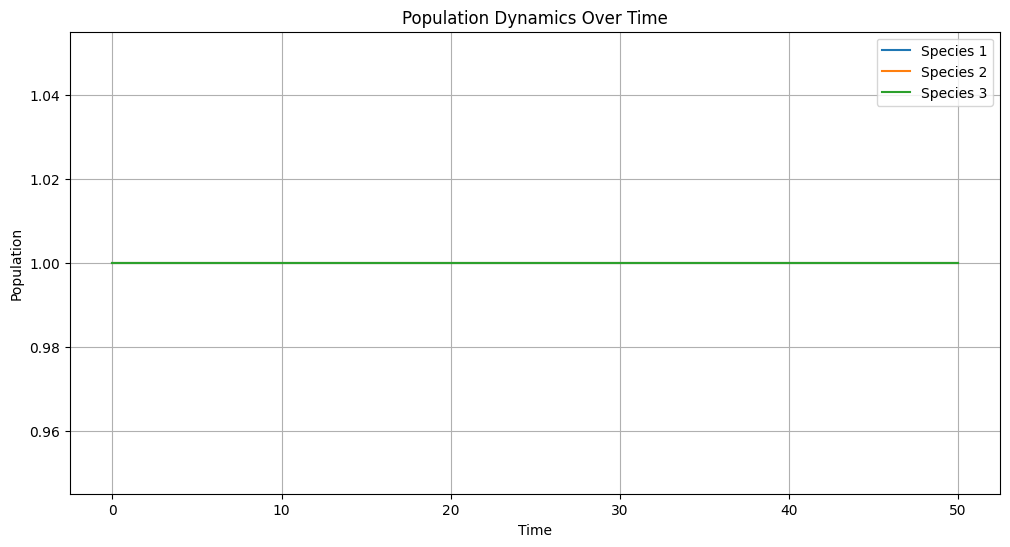

In [24]:
interaction_matrix = np.array([[1,  1, 1], 
                              [1,  1, 1],
                              [1,   1, 1]])

initial_populations = [1,1,1]
growth_rates = [-3, -3, -3] 
t_span = (0, 50) 
t_eval = np.linspace(0, 50, 50)
population_range = (0, 50)

plot_pop_phase(interaction_matrix, initial_populations, growth_rates, t_span)

#### Stable